<a href="https://colab.research.google.com/github/victorhss21/Estudos_CD/blob/main/Prepara%C3%A7%C3%A3o_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preparação dos dados**

 Neste notebook, iremos abordar técnicas para:
>
> * **Escalonamento dos dados** (Padronização, Min-Max Scaler, Robust Scaler, etc.)
>
> * **Transformação de variáveis categóricas** (Label Encoding, Target Enconding, OneHot Encoding, etc.)
>
> * **Seleção de features** (Métodos Incorporados, Filtros, Empacotamento/Wrapper, etc.)
>
> * **Redução de dimensionalidade** (PCA, LDA, etc.)

### **I. Escalonamento dos Dados** (Data Scaling)

O escalonamento **ajusta o intervalo dos dados** numéricos **sem alterar a forma de sua distribuição**.


#### **1. Padronização (StandardScaler)**

*   **O que é?**
    *   **Motivação:** Muitos algoritmos de ML (especialmente os **baseados em distância** como **KNN**, **SVM**, **K-Means**, e os que **usam gradiente descendente** como **Regressão Linear/Logística**, **Redes Neurais**) são **sensíveis à escala das features**. Features com *maiores magnitudes* podem *dominar indevidamente* o processo de aprendizado ou otimização.
    *   **Proposta:** Transformar os dados para que tenham **média zero (μ=0)** e **desvio padrão um (σ=1)**. **Não limita os valores a um intervalo específico**.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** Assume que os **dados seguem** (ou se aproximam) de uma **distribuição Gaussiana**, onde média e desvio padrão são estatísticas significativas. No entanto, é frequentemente **aplicado mesmo quando essa premissa não é estritamente verdadeira**.
    *   **Lógica:** Para cada valor `x` em uma feature, calcula-se o valor padronizado `z` usando a fórmula: `z = (x - μ) / σ`, onde `μ` é a média da feature e `σ` é o desvio padrão da feature, calculados **apenas** no conjunto de treino.
*   **Como utilizá-lo? (Python com `scikit-learn`)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dados de exemplo (Idade, Salário)
data = {'Idade': [25, 30, 35, 40, 45, 50, 55, 60],
        'Salario': [50000, 60000, 75000, 90000, 110000, 130000, 155000, 180000]}
df = pd.DataFrame(data)
features = ['Idade', 'Salario']

# Simular divisão treino/teste
X_train, X_test = train_test_split(df[features], test_size=0.25, random_state=42)

# 1. Instanciar o scaler
scaler = StandardScaler()

# 2. Ajustar SOMENTE nos dados de treino e transformar treino
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transformar os dados de teste com o scaler AJUSTADO no treino
X_test_scaled = scaler.transform(X_test)

print("Dados de Treino Originais:\n", X_train)
print("\nDados de Treino Escalados (Média ~0, DP ~1):\n", X_train_scaled)
print("\nMédia das features escaladas (Treino):", X_train_scaled.mean(axis=0))
print("DP das features escaladas (Treino):", X_train_scaled.std(axis=0))
print("\nDados de Teste Escalados:\n", X_test_scaled)


Dados de Treino Originais:
    Idade  Salario
0     25    50000
7     60   180000
2     35    75000
4     45   110000
3     40    90000
6     55   155000

Dados de Treino Escalados (Média ~0, DP ~1):
 [[-1.55563492 -1.33333333]
 [ 1.41421356  1.55555556]
 [-0.70710678 -0.77777778]
 [ 0.14142136  0.        ]
 [-0.28284271 -0.44444444]
 [ 0.98994949  1.        ]]

Média das features escaladas (Treino): [-2.03540888e-16  1.85037171e-17]
DP das features escaladas (Treino): [1. 1.]

Dados de Teste Escalados:
 [[-1.13137085 -1.11111111]
 [ 0.56568542  0.44444444]]


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Padrão para muitos algoritmos. **Menos sensível a outliers do que Min-Max** (mas ainda afetado, pois usa média/DP). **Preserva a forma da distribuição original** (apenas translada e redimensiona).
    *   **Limitações:** Não garante um intervalo fixo para os dados. A média e o desvio padrão são sensíveis a outliers, o que pode distorcer o escalonamento.
    *   **Precauções:** **Fundamental:** Ajustar (`fit`) o scaler ***apenas* no conjunto de treino** para evitar vazamento de dados (data leakage) do conjunto de teste para o processo de pré-processamento. Aplicar `transform` em ambos, treino e teste.
*   **Quais as principais dicas práticas?**
    *   É um bom ponto de partida "padrão" para a maioria dos algoritmos sensíveis à escala.
    *   Se seus dados tiverem **muitos outliers** significativos, **considere o `RobustScaler`** primeiro.
    *   Verifique visualmente (histogramas) a distribuição antes e depois para entender o efeito.

#### **2. Normalização (MinMaxScaler)**

*   **O que é?**
    *   **Motivação:** Alguns algoritmos ou cenários exigem que os **dados estejam estritamente dentro de um intervalo específico**, geralmente **[0, 1] (ou [-1, 1])**. Exemplos incluem processamento de imagens (intensidade de pixels) ou algumas ativações em redes neurais.
    *   **Proposta:** Redimensionar os dados para que fiquem **contidos em um intervalo definido**, preservando a relação entre os valores.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** **Não faz fortes suposições** sobre a distribuição, mas é **altamente influenciado pelos valores mínimo e máximo**.
    *   **Lógica:** Para cada valor `x` em uma feature, calcula-se o valor normalizado `x_scaled` usando a fórmula: `x_scaled = (x - min) / (max - min)`, onde `min` e `max` são os valores mínimo e máximo da feature, calculados **apenas** no conjunto de treino. Para um intervalo [a, b], a fórmula é ajustada.
*   **Como utilizá-lo? (Python com `scikit-learn`)**
   

In [41]:
from sklearn.preprocessing import MinMaxScaler
# ... (usando os mesmos dados e divisão treino/teste de antes) ...

# 1. Instanciar o scaler (intervalo padrão [0, 1])
min_max_scaler = MinMaxScaler()

# 2. Ajustar SOMENTE nos dados de treino e transformar treino
X_train_normalized = min_max_scaler.fit_transform(X_train)

# 3. Transformar os dados de teste
X_test_normalized = min_max_scaler.transform(X_test)

print("Dados de Treino Normalizados ([0, 1]):\n", X_train_normalized)
print("\nMínimo das features normalizadas (Treino):", X_train_normalized.min(axis=0))
print("Máximo das features normalizadas (Treino):", X_train_normalized.max(axis=0))
print("\nDados de Teste Normalizados:\n", X_test_normalized)
# Note que os valores no teste podem cair fora de [0, 1] se forem menores/maiores que min/max do treino


Dados de Treino Normalizados ([0, 1]):
 [[0.         0.        ]
 [1.         1.        ]
 [0.28571429 0.19230769]
 [0.57142857 0.46153846]
 [0.42857143 0.30769231]
 [0.85714286 0.80769231]]

Mínimo das features normalizadas (Treino): [0. 0.]
Máximo das features normalizadas (Treino): [1. 1.]

Dados de Teste Normalizados:
 [[0.14285714 0.07692308]
 [0.71428571 0.61538462]]


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Garante um **intervalo fixo**, útil para algoritmos específicos. Preserva relações de ordem e distribuições (comprime/expande o eixo).
    *   **Limitações:** **Extremamente sensível a outliers.** Um único valor muito alto ou baixo pode comprimir todo o restante dos dados em um intervalo muito pequeno, perdendo granularidade.
    *   **Precauções:** Trate ou **remova outliers** *antes* de usar `MinMaxScaler`. Ajuste apenas no treino.
*   **Quais as principais dicas práticas?**
    *   Use principalmente quando o algoritmo *exige* dados em um intervalo específico (ex: intensidade de pixels 0-255 para [0,1]).
    *   Se houver outliers, `MinMaxScaler` provavelmente não é a melhor escolha. Explore `RobustScaler` ou trate os outliers.



> É possível utilizar o Min-Max Scaler para gerar um intervalo fixo entre [-1, 1]. Para isso, basta modificar a fórmula da seguinte forma:

$$
X_{scaled} = \frac{X - Min}{Max - Min} \cdot (Max - min) + (Min)
$$

Na prática, podemos implementar isso facilmente utilizando o Scikit Learn da seguinte forma:

In [42]:
from sklearn.preprocessing import MinMaxScaler
# ... (usando os mesmos dados e divisão treino/teste de antes) ...

# 1. Instanciar o scaler (intervalo [-1, 1])
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

# 2. Ajustar SOMENTE nos dados de treino e transformar treino
X_train_normalized = min_max_scaler.fit_transform(X_train)

# 3. Transformar os dados de teste
X_test_normalized = min_max_scaler.transform(X_test)

print("Dados de Treino Normalizados ([-1, 1]):\n", X_train_normalized)
print("\nMínimo das features normalizadas (Treino):", X_train_normalized.min(axis=0))
print("Máximo das features normalizadas (Treino):", X_train_normalized.max(axis=0))
print("\nDados de Teste Normalizados:\n", X_test_normalized)
# Note que os valores no teste podem cair fora de [-1, 1] se forem menores/maiores que min/max do treino

Dados de Treino Normalizados ([-1, 1]):
 [[-1.         -1.        ]
 [ 1.          1.        ]
 [-0.42857143 -0.61538462]
 [ 0.14285714 -0.07692308]
 [-0.14285714 -0.38461538]
 [ 0.71428571  0.61538462]]

Mínimo das features normalizadas (Treino): [-1. -1.]
Máximo das features normalizadas (Treino): [1. 1.]

Dados de Teste Normalizados:
 [[-0.71428571 -0.84615385]
 [ 0.42857143  0.23076923]]


#### **3. Robust Scaler**



*   **O que é?**
    *   **Motivação:** A Padronização e a Normalização são sensíveis a outliers. Se o conjunto de dados contém valores extremos significativos, a média/DP (StandardScaler) ou min/max (MinMaxScaler) serão distorcidos.
    *   **Proposta:** Escalonar os dados usando estatísticas que são **robustas a outliers**: a **mediana** e o **intervalo interquartil** (IQR - Interquartile Range).
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** **Não assume uma distribuição específica** e é projetado para **lidar com outliers**.
    *   **Lógica:** Para cada valor `x` em uma feature, calcula-se o valor escalado `x_scaled` usando a fórmula: `x_scaled = (x - Q2) / (Q3 - Q1)`, onde `Q1` é o primeiro quartil (percentil 25), `Q2` é a mediana (percentil 50) e `Q3` é o terceiro quartil (percentil 75). `Q3 - Q1` é o IQR. **Mediana e IQR são muito menos afetados por valores extremos.**
*   **Como utilizá-lo? (Python com `scikit-learn`)**
    

In [60]:
from sklearn.preprocessing import RobustScaler
# ... (usando os mesmos dados e divisão treino/teste) ...

# Adicionar um outlier para demonstração
X_train_outlier = X_train.copy()
X_train_outlier.loc[len(X_train_outlier)] = {'Idade': 38, 'Salario': 1000000} # Outlier no salário

# 1. Instanciar o scaler
robust_scaler = RobustScaler()

# 2. Ajustar SOMENTE nos dados de treino (com outlier) e transformar treino
X_train_robust_scaled = robust_scaler.fit_transform(X_train_outlier)

# 3. Transformar os dados de teste (sem outlier aqui, mas usar o mesmo scaler)
X_test_robust_scaled = robust_scaler.transform(X_test) # X_test original

print("Dados de Treino (com outlier) Robust Scaled:\n", X_train_robust_scaled)
# Note que o escalonamento é menos afetado pelo outlier comparado ao StandardScaler/MinMaxScaler
print("\nDados de Teste Robust Scaled:\n", X_test_robust_scaled)


Dados de Treino (com outlier) Robust Scaled:
 [[-1.75       -0.59701493]
 [ 2.625       0.95522388]
 [-0.5        -0.29850746]
 [ 0.75        0.11940299]
 [ 0.125      -0.11940299]
 [-0.125      10.74626866]]

Dados de Teste Robust Scaled:
 [[-1.125      -0.47761194]
 [ 1.375       0.35820896]]


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Robusto a outliers. **Os dados escalados não são tão distorcidos por valores extremos.**
    *   **Limitações:** Não centraliza a média em 0 ou o desvio padrão em 1 necessariamente. O intervalo resultante não é fixo como no `MinMaxScaler`.
    *   **Precauções:** Ajuste apenas no treino.
*   **Quais as principais dicas práticas?**
    *   **Escolha padrão quando há suspeita ou confirmação de outliers significativos nos dados numéricos.**
    *   Pode ser combinado com detecção/tratamento de outliers, mas é útil quando se deseja manter os outliers (ou não se tem certeza se são erros ou valores extremos válidos).

### **II. Transformação de Variáveis Categóricas**

Modelos de ML geralmente exigem input numérico. Variáveis categóricas (strings ou categorias numéricas sem ordem intrínseca) precisam ser convertidas.

#### **1. Label Encoding**



*   **O que é?**
    *   **Motivação:** A forma mais simples de converter categorias em números.
    *   **Proposta:** Atribuir um número inteiro único (0, 1, 2, ...) a cada categoria distinta em uma feature.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** O algoritmo que receberá a feature *não* interpretará os números como tendo uma relação ordinal (ex: 2 > 1 > 0), a menos que essa relação realmente exista (feature ordinal).
    *   **Lógica:** Mapeamento direto: 'Vermelho' -> 0, 'Verde' -> 1, 'Azul' -> 2. A ordem é geralmente arbitrária (alfabética).
*   **Como utilizá-lo? (Python com `scikit-learn`)**
    ```python
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd

    data = {'Cor': ['Vermelho', 'Verde', 'Azul', 'Verde', 'Vermelho']}
    df = pd.DataFrame(data)

    # 1. Instanciar o encoder
    label_encoder = LabelEncoder()

    # 2. Ajustar e transformar (geralmente no dataset inteiro ou coluna específica)
    df['Cor_Encoded'] = label_encoder.fit_transform(df['Cor'])

    print("Label Encoding:\n", df)
    print("\nClasses mapeadas:", label_encoder.classes_)
    ```
*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Simples, rápido, eficiente em termos de memória (1 coluna).
    *   **Limitações:** **Introduz uma relação ordinal artificial** que não existe na maioria das variáveis categóricas nominais. Modelos lineares, SVMs, KNNs, Redes Neurais podem interpretar erroneamente que 'Azul' (2) é "maior" ou "mais importante" que 'Verde' (1).
    *   **Precauções:** **Geralmente inadequado para features de entrada (X)** em modelos não baseados em árvores. Use com cautela.
*   **Quais as principais dicas práticas?**
    *   **Ideal para a variável alvo (y) em problemas de classificação.** Muitos frameworks lidam bem com targets numéricos.
    *   **Pode ser usado para features ordinais** onde a ordem dos números faz sentido (ex: 'Baixo'=0, 'Médio'=1, 'Alto'=2).
    *   **Evite para features nominais de entrada** na maioria dos modelos. Use One-Hot Encoding ou outros métodos. Tree-based models (Decision Trees, Random Forest, Gradient Boosting) *podem* lidar bem com Label Encoding porque eles particionam o espaço, mas One-Hot é frequentemente mais seguro.


#### **2. One-Hot Encoding (OHE)**



*   **O que é?**
    *   **Motivação:** Representar variáveis categóricas nominais numericamente sem introduzir uma ordem artificial.
    *   **Proposta:** Criar novas colunas binárias (0 ou 1) para cada categoria presente na feature original.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** As categorias são independentes e não possuem relação ordinal.
    *   **Lógica:** Se uma feature 'Cor' tem categorias ['Vermelho', 'Verde', 'Azul'], OHE cria 3 novas colunas: 'Cor_Vermelho', 'Cor_Verde', 'Cor_Azul'. Para uma linha onde a cor era 'Verde', a linha terá `Cor_Vermelho=0`, `Cor_Verde=1`, `Cor_Azul=0`.
*   **Como utilizá-lo? (Python com `scikit-learn` ou `pandas`)**
    ```python
    from sklearn.preprocessing import OneHotEncoder
    import pandas as pd

    data = {'Cor': ['Vermelho', 'Verde', 'Azul', 'Verde', 'Vermelho'],
            'Tamanho': ['P', 'M', 'G', 'M', 'P']}
    df = pd.DataFrame(data)
    X = df[['Cor', 'Tamanho']] # Features para encodar

    # Usando Scikit-learn (preferível em pipelines)
    # sparse=False retorna array numpy, handle_unknown='ignore' evita erro se categoria nova aparecer no teste
    # drop='first' remove a primeira categoria de cada feature para evitar multicolinearidade (N-1 colunas)
    ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

    # Ajustar no TREINO, transformar TREINO e TESTE
    # Simulando treino/teste
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

    ohe_encoder.fit(X_train) # Ajusta com as categorias do treino
    X_train_ohe = ohe_encoder.transform(X_train)
    X_test_ohe = ohe_encoder.transform(X_test) # Transforma teste

    # Obter nomes das novas colunas
    feature_names = ohe_encoder.get_feature_names_out(['Cor', 'Tamanho'])
    X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=feature_names, index=X_train.index)
    X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=feature_names, index=X_test.index)

    print("One-Hot Encoding (Scikit-learn, drop='first'):\n", X_train_ohe_df)

    # Alternativa com Pandas (mais simples para análise exploratória)
    df_ohe_pd = pd.get_dummies(df, columns=['Cor', 'Tamanho'], drop_first=True)
    print("\nOne-Hot Encoding (Pandas, drop_first=True):\n", df_ohe_pd)
    ```
*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Representação não ambígua para categorias nominais. Funciona bem com a maioria dos algoritmos. Evita a armadilha da ordem artificial do Label Encoding.
    *   **Limitações:** **Aumenta significativamente a dimensionalidade** se a variável categórica tiver muitas categorias (alta cardinalidade), levando à "maldição da dimensionalidade" e potentially a esparsidade. Pode introduzir multicolinearidade se não usar `drop='first'` (a soma das colunas OHE para uma feature é sempre 1).
    *   **Precauções:** Cuidado com features de alta cardinalidade. Considere agrupar categorias raras em 'Outros' antes do OHE, ou usar outros métodos (Target Encoding, Embedding Layers). Use `handle_unknown='ignore'` ou similar para lidar com categorias não vistas no treino. `drop='first'` é recomendado para modelos lineares.
*   **Quais as principais dicas práticas?**
    *   **Método padrão para features nominais de baixa/média cardinalidade.**
    *   Sempre use `handle_unknown='ignore'` (ou equivalente) em produção ou ao lidar com dados de teste/novos.
    *   Para alta cardinalidade (>50-100 categorias, dependendo do dataset): agrupe categorias raras, use Target Encoding, ou Feature Hashing.
    *   Para modelos de árvore, `drop='first'` é menos crítico, mas ainda pode ajudar. Para modelos lineares, é importante.

#### **3. Target Encoding (Mean Encoding)**



*   **O que é?**
    *   **Motivação:** Capturar informação preditiva da variável alvo (target) diretamente na codificação da feature categórica, **especialmente útil para alta cardinalidade** e em competições (como Kaggle). Evita a explosão dimensional do OHE.
    *   **Proposta:** Substituir cada categoria pelo valor médio (ou outra agregação) da variável alvo para as amostras que pertencem a essa categoria.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** A média do target para uma categoria é uma representação útil de seu poder preditivo. Requer cuidado extremo para evitar vazamento de dados (target leakage).
    *   **Lógica:** Para uma categoria 'C' e um target 'y' (numérico ou binário 0/1), o valor codificado para 'C' é `mean(y | feature == 'C')`. Para evitar overfitting e leakage, esse cálculo **NÃO** deve usar o valor do target da própria linha que está sendo codificada. Estratégias comuns incluem:
        *   **Hold-out interno:** Calcular as médias em um conjunto de treino e aplicá-las a um conjunto de validação/teste.
        *   **Cross-Validation:** Dentro de cada fold de validação cruzada, calcular as médias apenas nos dados de treino do fold e aplicá-las aos dados de validação do fold.
        *   **Smoothing (Suavização):** Combina a média da categoria com a média global do target, dando mais peso à média global para categorias com poucas amostras. Fórmula comum: `encoded = (mean_category * count + mean_global * weight) / (count + weight)`. `weight` é um hiperparâmetro.
*   **Como utilizá-lo? (Exemplo conceitual com Smoothing)**
    ```python
    import pandas as pd
    from sklearn.model_selection import KFold

    # Dados de exemplo: Cidade, Target (e.g., Comprou=1, Não Comprou=0)
    data = {'Cidade': ['SP', 'RJ', 'SP', 'BH', 'RJ', 'SP', 'BH', 'SP', 'RJ', 'BH'],
            'Target': [  1,    0,    1,    0,    1,    0,    1,    1,    0,    0]}
    df = pd.DataFrame(data)

    # --- Implementação CUIDADOSA com KFold e Smoothing ---
    n_splits = 5 # Exemplo KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    feature = 'Cidade'
    target = 'Target'
    weight = 10 # Hiperparâmetro de suavização

    # Calcular a média global do target
    global_mean = df[target].mean()

    # Criar coluna para o encoding (inicializada com NaN ou média global)
    df[f'{feature}_TargetEncoded'] = global_mean

    # Iterar pelos folds da validação cruzada
    for train_index, val_index in kf.split(df):
        X_train, X_val = df.iloc[train_index], df.iloc[val_index]

        # Calcular médias e contagens SOMENTE no fold de treino atual
        means = X_train.groupby(feature)[target].mean()
        counts = X_train.groupby(feature)[target].count()

        # Aplicar smoothing
        smooth_means = (means * counts + global_mean * weight) / (counts + weight)

        # Mapear as médias suavizadas para o fold de VALIDAÇÃO atual
        df.loc[val_index, f'{feature}_TargetEncoded'] = X_val[feature].map(smooth_means)

        # Preencher NaNs que podem surgir (categorias raras só no fold de validação) com a média global
        df[f'{feature}_TargetEncoded'].fillna(global_mean, inplace=True)


    # Para aplicar em NOVOS dados (teste): Calcular médias/contagens em TODO o treino e aplicar.
    # Exemplo simplificado para aplicar no dataset inteiro (pós CV para treino):
    means_full_train = df.groupby(feature)[target].mean() # Idealmente do treino completo original
    counts_full_train = df.groupby(feature)[target].count()
    smooth_means_full = (means_full_train * counts_full_train + global_mean * weight) / (counts_full_train + weight)
    # df['New_Data_Encoded'] = df['Cidade'].map(smooth_means_full).fillna(global_mean) # Para novos dados

    print("Target Encoding com KFold Smoothing:\n", df)
    ```
    *Nota: Bibliotecas como `category_encoders` simplificam isso, mas entender o KFold/Smoothing é crucial.*
*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Pode ser muito preditivo, captura relação com o target. Não aumenta dimensionalidade como OHE. Ótimo para alta cardinalidade.
    *   **Limitações:** **Alto risco de overfitting e target leakage** se não implementado corretamente (usando CV, smoothing). Sensível a categorias raras (smoothing ajuda). Menos interpretável que OHE. Principalmente para classificação/regressão.
    *   **Precauções:** **Implementação cuidadosa é MANDATÓRIA.** Use KFold/Leave-One-Out CV para gerar os encodings no treino. Use smoothing.
*   **Quais as principais dicas práticas?**
    *   **"Game changer" em competições**, mas perigoso se mal feito.
    *   Sempre use alguma forma de regularização (smoothing, CV). O `weight` no smoothing é um hiperparâmetro importante para tunar.
    *   Pode vazar informação sobre a distribuição do target no teste se categorias raras no treino tiverem médias muito diferentes da média global.
    *   Considere adicionar ruído gaussiano pequeno aos encodings como outra forma de regularização.




#### **4. Weight of Evidence (WoE)**



*   **O que é?**
    *   **Motivação:** Criar uma **transformação monotônica** entre a feature (geralmente categórica ou numérica binarizada) e o **log-odds** do **target binário**. Popular em **modelagem de risco de crédito** para interpretabilidade com Regressão Logística.
    *   **Proposta:** Substituir cada categoria (ou bin de uma variável contínua) pelo seu valor de Weight of Evidence.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** Funciona melhor com target binário (event/non-event, good/bad). Variáveis contínuas precisam ser binarizadas (agrupadas) primeiro.
    *   **Lógica:** Para cada categoria/bin 'i':
        1.  Calcular a % de 'Bons' (evento=1) na categoria 'i': `%Bons_i = Count(Bons | Categoria=i) / Total Bons`
        2.  Calcular a % de 'Maus' (evento=0) na categoria 'i': `%Maus_i = Count(Maus | Categoria=i) / Total Maus`
        3.  Calcular WoE: `WoE_i = ln(%Bons_i / %Maus_i)`
        *   WoE > 0: Categoria tem mais 'Bons' que a média.
        *   WoE < 0: Categoria tem mais 'Maus' que a média.
        *   WoE ~ 0: Categoria tem distribuição similar à média.
    *   **Information Value (IV):** Frequentemente calculado junto com WoE para selecionar features. `IV = sum((%Bons_i - %Maus_i) * WoE_i)` por toda as categorias `i`. Mede o poder preditivo geral da feature.
*   **Como utilizá-lo? (Exemplo conceitual)**
    ```python
    import pandas as pd
    import numpy as np

    # Dados de exemplo: Risco (Categórico), Target (Inadimplente=1, Adimplente=0)
    data = {'Risco': ['Alto', 'Baixo', 'Medio', 'Alto', 'Baixo', 'Medio', 'Alto', 'Baixo', 'Medio', 'Alto'],
            'Target': [  1,      0,       0,      1,      0,       1,       0,      0,       1,      1]}
    df = pd.DataFrame(data)
    feature = 'Risco'
    target = 'Target'

    # Calcular totais de Bons (Target=0) e Maus (Target=1)
    total_maus = df[target].sum()
    total_bons = len(df) - total_maus

    # Agrupar para calcular contagens por categoria
    agg_df = df.groupby(feature)[target].agg(['count', 'sum']) # sum = count de Maus (Target=1)
    agg_df.rename(columns={'count': 'Total_Obs', 'sum': 'Maus'}, inplace=True)
    agg_df['Bons'] = agg_df['Total_Obs'] - agg_df['Maus']

    # Calcular percentuais (adicionando pequeno valor para evitar divisão por zero)
    epsilon = 1e-6
    agg_df['%Bons'] = (agg_df['Bons'] + epsilon) / (total_bons + epsilon)
    agg_df['%Maus'] = (agg_df['Maus'] + epsilon) / (total_maus + epsilon)

    # Calcular WoE
    agg_df['WoE'] = np.log(agg_df['%Bons'] / agg_df['%Maus'])

    # Calcular contribuição para IV
    agg_df['IV_contrib'] = (agg_df['%Bons'] - agg_df['%Maus']) * agg_df['WoE']
    iv_total = agg_df['IV_contrib'].sum()

    print("Weight of Evidence (WoE) e Information Value (IV):\n", agg_df)
    print(f"\nInformation Value Total para '{feature}': {iv_total:.4f}")

    # Mapear WoE de volta ao dataframe original (usar apenas no treino/aplicar no teste)
    woe_map = agg_df['WoE'].to_dict()
    df[f'{feature}_WoE'] = df[feature].map(woe_map)
    print("\nDataFrame com WoE mapeado:\n", df)
    ```
*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Cria relação monotônica com log-odds, **ótimo para interpretabilidade de modelos lineares** (especialmente Regressão Logística). Lida bem com categorias. **IV fornece métrica de seleção de features**.
    *   **Limitações:** Principalmente para **target binário**. Requer binarização para features contínuas (a qualidade depende dos bins). **Sensível à estratégia de binarização**. Pode "achatar" informação dentro dos bins.
    *   **Precauções:** Calcular WoE e IV **apenas** no conjunto de treino. **A binarização de contínuas é crítica e requer cuidado** (ex: usar Decision Tree para encontrar bons pontos de corte, garantir amostras suficientes por bin).
*   **Quais as principais dicas práticas?**
    *   **Padrão ouro em modelagem de risco de crédito.**
    *   Use IV para seleção de features: < 0.02 (Inútil), 0.02-0.1 (Fraca), 0.1-0.3 (Média), 0.3-0.5 (Forte), > 0.5 (Suspeita/Muito Forte).
    *   Garanta que cada bin/categoria tenha uma % mínima de observações (ex: 5%).
    *   Verifique a monotonicidade do WoE após a binarização (geralmente desejável).


### III. Seleção de Features (Feature Selection)

**Reduzir o número de features** de entrada para **melhorar o desempenho** do modelo, **reduzir overfitting**, **acelerar o treinamento** e **aumentar a interpretabilidade.**

#### **1. Métodos Filtro (Filter Methods)**


*   **O que é?**
    *   **Motivação:** **Remover features** irrelevantes ou redundantes rapidamente, **antes mesmo de treinar um modelo** complexo.
    *   **Proposta:** Avaliar e classificar features com base em suas **características estatísticas intrínsecas** (relação com o target ou variância própria), **independentemente de qualquer modelo de ML**.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** Métricas estatísticas (**correlação, variância, testes de hipóteses**) são bons indicadores da utilidade da feature. Ignora **interações entre features** - no máximo, **bivariada** (comparando pares de features, como na correlação, **mas focando em redundância**, não em poder preditivo conjunto).
    *   **Lógica:** Calcula uma métrica para cada feature (ou par) e filtra com base em um limiar. Exemplos:
        *   **VarianceThreshold:** Remove features com **variância zero ou abaixo de um limiar** (features constantes ou quase constantes).
        *   **Correlação:** Remove uma de um par de **features altamente correlacionadas** (redundância). Calcula a correlação de Pearson (num-num), Spearman (ordinal/não-linear).
        *   **Testes Estatísticos (com o target):**
            *   **ANOVA F-test:** Para features numéricas e target categórico. Mede a diferença de médias da feature entre as classes. (`f_classif`)
            *   **Chi-Quadrado (χ²):** Para features categóricas e target categórico. Mede a dependência entre a feature e o target. (`chi2`)
            *   **Informação Mútua:** Mede a dependência mútua entre duas variáveis (numéricas ou categóricas), capturando relações não lineares. (`mutual_info_classif`, `mutual_info_regression`)
*   **Como utilizá-lo? (Python com `scikit-learn` e `pandas`)**
   

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

data = {
    'N1': np.random.rand(100) * 10,
    'N2': np.random.rand(100) * 5 + 2,
    'N_QuaseConstante': [1]*98 + [1.1, 1.2],
    'C1': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'C2': np.random.choice(['X', 'Y'], 100),
    'Target_Class': np.random.randint(0, 3, 100), # Target Categórico (0, 1, 2)
    'Target_Reg': np.random.rand(100) * 50 # Target Numérico
}
df = pd.DataFrame(data)


# Instancia selector variance
selector_variance = VarianceThreshold(threshold=0.01) # Remove features com variância menor ou igual a 0.01

# Especifica features numéricas
df_num_features = df.select_dtypes(include=['number']).drop(['Target_Class','Target_Reg'], axis=1)

# Aplicar selecto variance as features numéricas
selector_variance.fit(df_num_features)

# Identifica features que foram selecionadas
print(f"Features pré VarianceThreshold: {df_num_features.columns.values}")
print(f"Features pós VarianceThreshold: {selector_variance.get_feature_names_out()}")

Features pré VarianceThreshold: ['N1' 'N2' 'N_QuaseConstante']
Features pós VarianceThreshold: ['N1' 'N2']


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Dados de exemplo (Numéricas: N1, N2, N_QuaseConstante; Categóricas: C1, C2)
data = {
    'N1': np.random.rand(100) * 10,
    'N2': np.random.rand(100) * 5 + 2,
    'N_QuaseConstante': [1]*98 + [1.1, 1.2],
    'C1': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'C2': np.random.choice(['X', 'Y'], 100),
    'Target_Class': np.random.randint(0, 3, 100), # Target Categórico (0, 1, 2)
    'Target_Reg': np.random.rand(100) * 50 # Target Numérico
}
df = pd.DataFrame(data)

display(df.head())
display(df.shape)

,N1,N2,N_QuaseConstante,C1,C2,Target_Class,Target_Reg
0,1.139764,3.585621,1.0,D,X,1,22.520008
1,5.071230,3.027857,1.0,A,X,0,25.439216
2,4.652684,4.920211,1.0,B,X,1,30.206564
3,9.264858,4.087303,1.0,B,Y,1,48.612184
4,4.387268,2.724174,1.0,B,X,2,9.136977


(100, 7)

In [21]:
# --- Filtro de Variância ---
selector_var = VarianceThreshold(threshold=0.01) # Remove features com variância <= 0.01

# Aplicar em dados numéricos (idealmente após escalonamento se as escalas originais variarem muito)
N_features = ['N1', 'N2', 'N_QuaseConstante']
selector_var.fit(df[N_features])
print("Features mantidas após VarianceThreshold:",
      selector_var.get_feature_names_out(N_features))

Features mantidas após VarianceThreshold: ['N1' 'N2']


In [22]:
# --- Filtro de Correlação (Exemplo) ---
correlation_matrix = df[['N1', 'N2']].corr()
print("\nMatriz de Correlação:\n", correlation_matrix)

# Tipicamente, se |corr| > 0.8 ou 0.9, considera-se remover uma das features


Matriz de Correlação:
         N1      N2
N1  1.0000  0.1078
N2  0.1078  1.0000


In [24]:
# --- Filtros baseados no Target (SelectKBest) ---

# --- Cenário 1: Features Numéricas vs Target Categórico (ANOVA F-test) ---

# 1. Escolher a métrica e o número de features (k)
#    SelectKBest: Classe que seleciona features com base nos 'k' maiores scores.
#    score_func=f_classif: Especifica a função de pontuação a ser usada.
#        f_classif: Calcula o teste F de ANOVA (Análise de Variância).
#                   Este teste é adequado para:
#                       - Features de entrada (X): Numéricas
#                       - Variável Alvo (y): Categórica
#                   Ele mede se as médias da feature numérica são significativamente
#                   diferentes entre os grupos definidos pelo target categórico.
#                   Um valor F alto e um p-valor baixo sugerem que a feature ajuda
#                   a discriminar as classes do target.
#    k=1: Queremos selecionar apenas a UMA (k=1) melhor feature numérica
#         com base no score F de ANOVA.
selector_f_classif = SelectKBest(score_func=f_classif, k=1)

# 2. Aplicar o seletor aos dados
#    df[['N1', 'N2']]: Selecionamos apenas as features NUMÉRICAS de entrada.
#    df['Target_Class']: Fornecemos a variável alvo CATEGÓRICA.
#    .fit(X, y): Este método faz o seguinte:
#        a. Para CADA feature em X ('N1' e 'N2'):
#           Calcula o score usando a função especificada (f_classif) em relação a 'y'.
#           Neste caso, calcula o F-score de ANOVA para 'N1' vs 'Target_Class'
#           e para 'N2' vs 'Target_Class'.
#        b. Armazena internamente os scores calculados para todas as features.
#        c. Identifica qual(is) feature(s) tem(êm) os 'k' maiores scores.
#    Importante: O método `fit` NÃO modifica os dados originais (X ou y).
#                Ele apenas calcula e armazena os resultados da análise.
selector_f_classif.fit(df[['N1', 'N2']], df['Target_Class'])

# 3. Analisar os resultados
#    .get_feature_names_out(['N1', 'N2']): Retorna os nomes das features que foram
#                                          SELECIONADAS (as 'k' melhores).
#                                          Passar os nomes originais ajuda a obter
#                                          nomes significativos na saída.
print("\nMelhor feature numérica para Target_Class (ANOVA):",
      selector_f_classif.get_feature_names_out(['N1', 'N2']))

#    .scores_: Atributo que armazena os scores calculados para TODAS as features
#              que foram avaliadas durante o `fit`, na mesma ordem em que foram passadas.
#              Permite ver a pontuação de cada feature, não apenas da(s) selecionada(s).
print("Scores ANOVA:", selector_f_classif.scores_)


Melhor feature numérica para Target_Class (ANOVA): ['N1']
Scores ANOVA: [0.58832312 0.4686794 ]


In [25]:
# --- Filtros baseados no Target (SelectKBest) ---

# --- Cenário 2: Features Categóricas vs Target Categórico (Chi2) ---

# 4. Pré-processamento NECESSÁRIO para Chi2
#    O teste Qui-Quadrado (Chi2) opera sobre tabelas de contingência, comparando
#    frequências observadas com frequências esperadas sob a hipótese de independência.
#    Ele requer que as entradas sejam NUMÉRICAS e NÃO-NEGATIVAS.
#    Nossas features 'C1' e 'C2' são strings ('A', 'B', 'X', 'Y', etc.).
#    LabelEncoder: Converte cada categoria string em um número inteiro (0, 1, 2...).
#                  É uma forma rápida de obter a representação numérica necessária.
#                  NOTA: Embora introduza uma ordem artificial (que Chi2 não usa),
#                        é comum usá-lo aqui para aplicar o teste em filtros.
#                        OneHotEncoding também funcionaria, mas geraria mais colunas
#                        e exigiria aplicar Chi2 a cada coluna binária resultante.
le = LabelEncoder()
df['C1_Encoded'] = le.fit_transform(df['C1'])
df['C2_Encoded'] = le.fit_transform(df['C2'])

# 5. Escolher a métrica e k para features categóricas
#    SelectKBest: Mesma classe de antes.
#    score_func=chi2: Especifica a função de pontuação Qui-Quadrado.
#        chi2: Adequado para:
#                - Features de entrada (X): Categóricas (codificadas como numéricas não-negativas)
#                - Variável Alvo (y): Categórica
#              Testa a hipótese nula de que a feature e o target são independentes.
#              Um valor Chi2 alto e um p-valor baixo sugerem uma dependência
#              entre a feature e o target (ou seja, a feature é relevante).
#    k=1: Queremos selecionar a UMA melhor feature categórica (codificada).
selector_chi2 = SelectKBest(score_func=chi2, k=1)

# 6. Aplicar o seletor aos dados CATEGÓRICOS CODIFICADOS
#    df[['C1_Encoded', 'C2_Encoded']]: Usamos as versões NUMÉRICAS das features categóricas.
#    df['Target_Class']: O target ainda é o mesmo (categórico).
#    .fit(X, y): Calcula o score Chi2 para 'C1_Encoded' vs 'Target_Class'
#                e para 'C2_Encoded' vs 'Target_Class'. Armazena os scores
#                e identifica a feature com o maior score (top k=1).
selector_chi2.fit(df[['C1_Encoded', 'C2_Encoded']], df['Target_Class'])

# 7. Analisar os resultados para Chi2
#    .get_feature_names_out(['C1_Encoded', 'C2_Encoded']): Mostra qual feature codificada foi selecionada.
print("\nMelhor feature categórica para Target_Class (Chi2):",
       selector_chi2.get_feature_names_out(['C1_Encoded', 'C2_Encoded']))
#    .scores_: Mostra os scores Chi2 para ambas as features codificadas.
print("Scores Chi2:", selector_chi2.scores_)


Melhor feature categórica para Target_Class (Chi2): ['C1_Encoded']
Scores Chi2: [0.64203457 0.45190814]


In [26]:
# --- Cenário 3: Informação Mútua (Exemplo de uso direto da função de score) ---

# 8. Calcular Scores de Informação Mútua
#    mutual_info_classif: Calcula a Informação Mútua entre cada feature e o target discreto.
#        Informação Mútua (MI): Mede a redução na incerteza sobre o target 'y'
#                                ao conhecer o valor da feature 'X'.
#                                Vantagens:
#                                   - Captura dependências NÃO LINEARES.
#                                   - Pode ser usada para features numéricas ou categóricas.
#                                   - Valor >= 0. Zero significa independência.
#    df[['N1', 'N2', 'C1_Encoded', 'C2_Encoded']]: Passamos todas as features (numéricas e categóricas codificadas).
#    df['Target_Class']: O target categórico.
#    discrete_features=[False, False, True, True]: Um *hint* importante para a função.
#        Indica quais colunas em X devem ser tratadas como discretas/categóricas.
#        'N1', 'N2' são contínuas (False).
#        'C1_Encoded', 'C2_Encoded' são discretas (True).
#        Isso ajuda o algoritmo a usar os estimadores corretos de MI.
#    A função retorna diretamente um array com os scores MI para cada feature.
mi_scores = mutual_info_classif(df[['N1', 'N2', 'C1_Encoded', 'C2_Encoded']], df['Target_Class'], discrete_features=[False, False, True, True])

# 9. Exibir os scores MI
#    Colocamos os scores em uma Série Pandas para melhor visualização com os nomes das features.
print("\nScores de Informação Mútua (vs Target_Class):\n", pd.Series(mi_scores, index=['N1', 'N2', 'C1_Encoded', 'C2_Encoded']))
#    NOTA: Aqui, apenas calculamos os scores. Se quiséssemos usar MI dentro do
#          SelectKBest, faríamos: SelectKBest(score_func=mutual_info_classif, k=...)
#          e depois o `.fit()`. Usar a função diretamente é útil para apenas
#          ver os scores e decidir um limiar manualmente, ou para usar em cenários
#          onde os hints como `discrete_features` são necessários e SelectKBest
#          pode não passá-los diretamente (embora versões recentes possam ter melhorado isso).


Scores de Informação Mútua (vs Target_Class):
 N1            0.000000
N2            0.000000
C1_Encoded    0.007296
C2_Encoded    0.003625
dtype: float64


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Rápido, computacionalmente barato. **Independente do modelo** (resultados podem ser usados para qualquer algoritmo). **Bom para uma primeira triagem** e redução de dimensionalidade.
    *   **Limitações:** **Ignora interações entre features** (uma feature pode ser ruim sozinha, mas ótima em combinação com outra). A escolha do limiar/método é crucial e pode não ser ótima para o modelo final. **Não garante o melhor subconjunto de features para um *modelo específico***.
    *   **Precauções:** Escolha a métrica estatística apropriada para o tipo de feature e target (num/cat). Cuidado com a interpretação de correlação (não implica causalidade).
*   **Quais as principais dicas práticas?**
    *   **Sempre comece removendo features de variância zero ou muito baixa.**
    *   Verifique altas correlações (>0.9) entre features e **remova as redundantes** (**mantenha** a que tiver **maior correlação com o target** ou a mais interpretável).
    *   Use testes estatísticos (ANOVA, Chi2, MI) para classificar features com base na relação com o target, **mas não confie *apenas* nisso**. Use como guia.
    *   Combine com conhecimento de domínio para validar se a remoção faz sentido.



#### **2. Métodos Empacotamento (Wrapper Methods)**


*   **O que é?**
    *   **Motivação:** Selecionar features considerando diretamente o **desempenho de um modelo de ML específico**. Supera a limitação dos filtros de ignorar interações.
    *   **Proposta:** Tratar a seleção de features como um **problema de busca**, onde diferentes **subconjuntos de features são usados para treinar e avaliar um modelo**. O subconjunto que resulta no melhor desempenho (segundo uma métrica escolhida) é selecionado.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** O desempenho do modelo escolhido no wrapper é um bom proxy para o desempenho final. O espaço de busca pode ser explorado eficientemente.
    *   **Lógica:** Utiliza um algoritmo de ML como "caixa preta". Exemplos de estratégias de busca:
        *   **Forward Selection:** Começa sem features, adiciona uma por vez (a que mais melhora o desempenho) até um critério de parada.
        *   **Backward Elimination:** Começa com todas as features, remove uma por vez (a que menos prejudica o desempenho, ou cuja remoção mais melhora) até um critério de parada.
        *   **Recursive Feature Elimination (RFE):** Treina o modelo, remove a feature menos importante (baseado em coeficientes ou feature importance), retreina com as restantes, repetindo até o número desejado de features.
        *   **Sequential Feature Selector (SFS):** Implementação moderna no Scikit-learn para Forward/Backward selection, com suporte a CV.
*   **Como utilizá-lo? (Python com `scikit-learn`)**
  


In [2]:
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression # Exemplo de estimador
from sklearn.ensemble import RandomForestClassifier # Outro exemplo
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Dados de exemplo (Numéricas: N1, N2, N_QuaseConstante; Categóricas: C1, C2)
data = {
    'N1': np.random.rand(100) * 10,
    'N2': np.random.rand(100) * 5 + 2,
    'N_QuaseConstante': [1]*98 + [1.1, 1.2],
    'C1': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'C2': np.random.choice(['X', 'Y'], 100),
    'Target_Class': np.random.randint(0, 3, 100), # Target Categórico (0, 1, 2)
    'Target_Reg': np.random.rand(100) * 50 # Target Numérico
}
df = pd.DataFrame(data)

display(df.head())
display(df.shape)

In [6]:
# ... (usando os dados numéricos e target categórico do exemplo anterior) ...
X = df[['N1', 'N2']] # Features numéricas
y = df['Target_Class']

In [7]:
# --- RFE (Recursive Feature Elimination) ---

# Escolher um estimador (modelo) que forneça pesos/importâncias
estimator_lr = LogisticRegression(solver='liblinear')

# Selecionar N features (ex: 1)
selector_rfe = RFE(estimator=estimator_lr, n_features_to_select=1, step=1) # step=1 remove 1 por vez
selector_rfe.fit(X, y)
print("\nRFE Seleção (n=1):", selector_rfe.support_) # True/False para cada feature
print("RFE Ranking:", selector_rfe.ranking_) # 1 = selecionada, 2 = eliminada primeiro, etc.
print("Features selecionadas por RFE:", X.columns[selector_rfe.support_])


RFE Seleção (n=1): [False  True]
RFE Ranking: [2 1]
Features selecionadas por RFE: Index(['N2'], dtype='object')


In [8]:
# --- RFECV (RFE com Cross-Validation para encontrar N ótimo) ---

# Usa CV para determinar o número ideal de features
cv_strategy = StratifiedKFold(5)
estimator_rf = RandomForestClassifier(random_state=42, n_estimators=10) # Exemplo com RandomForest
selector_rfecv = RFECV(estimator=estimator_rf, step=1, cv=cv_strategy, scoring='accuracy', min_features_to_select=1)
selector_rfecv.fit(X, y) # Usa mais recursos computacionais
print(f"\nRFECV: Número ótimo de features encontrado: {selector_rfecv.n_features_}")
print("RFECV Seleção:", selector_rfecv.support_)
print("Features selecionadas por RFECV:", X.columns[selector_rfecv.support_])
print("RFECV Scores por número de features:", selector_rfecv.cv_results_['mean_test_score']) # Desempenho CV


RFECV: Número ótimo de features encontrado: 2
RFECV Seleção: [ True  True]
Features selecionadas por RFECV: Index(['N1', 'N2'], dtype='object')
RFECV Scores por número de features: [0.25 0.31]


In [9]:
# --- Sequential Feature Selector (SFS) ---

# Forward Selection
sfs_forward = SequentialFeatureSelector(estimator_lr, n_features_to_select='auto', # ou um número
                                        tol=None, # Para n_features_to_select='auto'
                                        direction='forward', scoring='accuracy', cv=cv_strategy, n_jobs=-1)
sfs_forward.fit(X, y)
print("\nSFS Forward Seleção:", sfs_forward.get_support())
print("Features selecionadas por SFS Forward:", sfs_forward.get_feature_names_out())


SFS Forward Seleção: [ True False]
Features selecionadas por SFS Forward: ['N1']


In [10]:
# --- Sequential Feature Selector (SFS) ---

# Backward Elimination (começa com todas)
sfs_backward = SequentialFeatureSelector(estimator_lr, n_features_to_select=1, # Ex: selecionar 1
                                          direction='backward', scoring='accuracy', cv=cv_strategy, n_jobs=-1)
sfs_backward.fit(X, y)
print("\nSFS Backward Seleção (n=1):", sfs_backward.get_support())
print("Features selecionadas por SFS Backward:", sfs_backward.get_feature_names_out())



SFS Backward Seleção (n=1): [ True False]
Features selecionadas por SFS Backward: ['N1']


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Considera interações entre features (via desempenho do modelo). Pode encontrar **subconjuntos de features mais performáticos** do que **filtros**. **Adaptado ao modelo que será usado**.
    *   **Limitações:** **Computacionalmente muito caro**, pois requer múltiplos treinamentos do modelo base. **Risco de overfitting no processo de seleção se não usar validação cruzada robusta** (como no RFECV/SFS com CV). **O resultado é específico para o modelo usado no wrapper**.
    *   **Precauções:** Use validação cruzada (RFECV, SFS com `cv`) para evitar overfitting na seleção. Escolha um modelo base representativo ou o modelo final desejado (se o custo permitir). **Pode ser inviável para datasets muito grandes ou modelos muito lentos.**
*   **Quais as principais dicas práticas?**
    *   **RFECV é uma escolha popular e robusta** se o custo computacional for aceitável, **pois encontra o número ideal de features.**
    *   Se o **custo for proibitivo**, use **RFE com um número fixo de features (escolhido por heurística ou filtro)** ou use um **modelo base mais rápido** (ex: Regressão Logística) no wrapper, mesmo que o modelo final seja outro (pode dar uma boa aproximação).
    *   Para datasets muito largos (muitas features), comece com um filtro para reduzir o espaço de busca antes de aplicar um wrapper.


#### **3. Métodos Incorporados (Embedded Methods)**



*   **O que é?**
    *   **Motivação:** Realizar a seleção de features como **parte intrínseca do processo de treinamento do modelo**, buscando um equilíbrio entre eficiência computacional e desempenho.
    *   **Proposta:** Utilizar **algoritmos de ML que possuem mecanismos internos de seleção de features** ou que atribuem **pesos/importâncias às features** durante o treinamento.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** O processo de otimização do modelo consegue identificar e penalizar/ignorar features menos relevantes.
    *   **Lógica:** A seleção ocorre naturalmente durante o `fit`. Exemplos:
        *   **Regularização L1 (Lasso):** Adiciona um termo de penalidade à função de custo igual à soma dos valores absolutos dos coeficientes (`alpha * sum(|coefs|)`). **Isso força coeficientes de features menos importantes a irem exatamente para zero**, efetivamente selecionando features.
        *   **Modelos baseados em Árvores (Random Forest, Gradient Boosting):** Calculam a **importância de cada feature** com base em quanto ela contribui para a **redução da impureza** (Gini, entropia) ou erro nos nós das árvores. Features com baixa importância podem ser descartadas.
        *   **Elastic Net:** Combina regularização L1 e L2.
*   **Como utilizá-lo? (Python com `scikit-learn`)**
    

In [1]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import numpy as np

# Dados de exemplo (Numéricas: N1, N2, N_QuaseConstante; Categóricas: C1, C2)
data = {
    'N1': np.random.rand(100) * 10,
    'N2': np.random.rand(100) * 5 + 2,
    'N_QuaseConstante': [1]*98 + [1.1, 1.2],
    'C1': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'C2': np.random.choice(['X', 'Y'], 100),
    'Target_Class': np.random.randint(0, 3, 100), # Target Categórico (0, 1, 2)
    'Target_Reg': np.random.rand(100) * 50 # Target Numérico
}
df = pd.DataFrame(data)

display(df.head())
display(df.shape)

,N1,N2,N_QuaseConstante,C1,C2,Target_Class,Target_Reg
0,7.383292,5.037207,1.0,D,Y,1,20.383438
1,7.085384,4.931399,1.0,C,X,1,32.472345
2,9.541262,5.500711,1.0,A,Y,2,6.171159
3,2.870205,3.544928,1.0,D,X,0,7.716680
4,3.018764,6.579619,1.0,D,Y,0,11.698317


(100, 7)

In [6]:
# ... (usando os dados numéricos e target categórico do exemplo anterior) ...
X = df[['N1', 'N2']] # Features numéricas
y = df['Target_Class']

In [35]:
# --- Lasso (Regularização L1) ---

# É importante escalar os dados para Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LassoCV encontra o melhor alpha (força da regularização) via CV
lasso_cv = LassoCV(cv=5, random_state=42, n_jobs=-1).fit(X_scaled, y)
print(f"\nLassoCV: Melhor alpha encontrado: {lasso_cv.alpha_:.4f}")

# Treinar Lasso com o melhor alpha
lasso = Lasso(alpha=lasso_cv.alpha_).fit(X_scaled, y)
print("Coeficientes Lasso:", lasso.coef_)

# Seleciona features com coef. diferentes de zero
selected_lasso_features = X.columns[lasso.coef_ != 0]
print("Features selecionadas por Lasso (coef != 0):", selected_lasso_features)


LassoCV: Melhor alpha encontrado: 0.0707
Coeficientes Lasso: [ 0.00000000e+00 -2.66453526e-17]
Features selecionadas por Lasso (coef != 0): Index(['N2'], dtype='object')


In [36]:
# --- Feature Importance de Árvores ---

rf = RandomForestClassifier(random_state=42, n_estimators=50)

rf.fit(X, y) # Escalonamento menos crítico para RF puro, mas bom para interpretabilidade da importância

importances = rf.feature_importances_
print("\nImportância das Features (Random Forest):", importances)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)


Importância das Features (Random Forest): [0.51425675 0.48574325]


,Feature,Importance
0,N1,0.514257
1,N2,0.485743


In [43]:
# --- Usando SelectFromModel (Meta-transformador) ---

# Seleciona features com base em um limiar de importância/coeficiente

# Exemplo com RandomForest
sfm_rf = SelectFromModel(estimator=RandomForestClassifier(random_state=42, n_estimators=50),
                          threshold='median') # threshold pode ser numérico ('0.1'), ou 'mean', 'median'
sfm_rf.fit(X, y)
print("\nSelectFromModel (RF, threshold='median') Seleção:", sfm_rf.get_support())
print("Features selecionadas por SFM (RF):", sfm_rf.get_feature_names_out())

# Exemplo com Lasso (requer dados escalados)
sfm_lasso = SelectFromModel(estimator=Lasso(alpha=lasso_cv.alpha_))
# threshold='auto' não funciona bem com Lasso (usa 1e-5), melhor usar coef != 0 manualmente ou especificar limiar

sfm_lasso.fit(X_scaled, y) # Fit no escalado

print("\nSelectFromModel (Lasso) Seleção:", sfm_lasso.get_support())
# Get names do original X
print("Features selecionadas por SFM (Lasso):", X.columns[sfm_lasso.get_support()])



SelectFromModel (RF, threshold='median') Seleção: [ True False]
Features selecionadas por SFM (RF): ['N1']

SelectFromModel (Lasso) Seleção: [False False]
Features selecionadas por SFM (Lasso): Index([], dtype='object')


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** **Mais eficiente que wrappers** (seleção integrada ao treino). Considera interações (implícito no modelo). **Geralmente bom desempenho.**
    *   **Limitações:** A seleção é **específica do modelo usado**. *Importâncias de árvores* podem ser **enviesadas para features numéricas ou categóricas de alta cardinalidade**. Lasso tende a selecionar aleatoriamente uma entre features altamente correlacionadas.
    *   **Precauções:** **Escalone os dados para modelos lineares com regularização** (Lasso, Ridge, ElasticNet). Esteja ciente dos vieses da feature importance (considere **Permutation Importance** como alternativa mais robusta, embora mais custosa).
*   **Quais as principais dicas práticas?**
    *   **Lasso é excelente para criar modelos esparsos (muitos coeficientes zero)**, útil quando se suspeita que muitas features são irrelevantes.
    *   **Feature importance de árvores é muito popular**, mas use com cautela. Verifique a estabilidade (ex: treine vários RF com seeds diferentes) e considere `PermutationImportance`.
    *   `SelectFromModel` é uma forma conveniente de aplicar a seleção após treinar um modelo embedded.
    *   Combine diferentes métodos: **Use filtros para uma redução inicial**, depois um método embedded ou wrapper para refinar a seleção.

### IV. Redução de Dimensionalidade

Técnicas que **transformam** os dados de um **espaço de alta dimensão** para um de **baixa dimensão**, criando **novas features (combinações das originais)** em vez de apenas *selecionar* features existentes.

#### **1. PCA (Principal Component Analysis - Análise de Componentes Principais)**


*   **O que é?**
    *   **Motivação:** Reduzir a dimensionalidade **preservando o máximo possível da variância original dos dados**. Útil para **visualização**, compressão de dados, **remoção de multicolinearidade** e, às vezes, melhoria de desempenho de modelos sensíveis à dimensionalidade. É uma técnica **não supervisionada**.
    *   **Proposta:** Encontrar um novo conjunto de **eixos ortogonais** (Componentes Principais - PCs) no **espaço das features originais**, tais que a **variância** dos dados projetados nesses eixos seja **maximizada**. Os PCs são ordenados pela quantidade de variância que explicam.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** Assume que as direções de maior variância nos dados são as mais importantes (contêm mais informação/sinal). *Funciona melhor com relações aproximadamente lineares*. **Requer que os dados estejam escalonados** (geralmente Padronizados com StandardScaler).
    *   **Lógica:**
        1.  Calcula a matriz de covariância dos dados (escalonados).
        2.  Calcula os autovetores e autovalores dessa matriz.
        3.  Os autovetores são os Componentes Principais (direções).
        4.  Os autovalores indicam a variância explicada por cada PC correspondente.
        5.  Ordena os PCs em ordem decrescente de autovalores.
        6.  Seleciona os `k` primeiros PCs (onde `k` < número original de features).
        7.  Projeta os dados originais nesses `k` PCs (produto escalar) para obter as novas features de dimensão reduzida.
*   **Como utilizá-lo? (Python com `scikit-learn`)**
   

In [46]:
import pandas as pd
import numpy as np

# Dados de exemplo (Numéricas: N1, N2, N_QuaseConstante; Categóricas: C1, C2)
data = {
    'N1': np.random.rand(100) * 10,
    'N2': np.random.rand(100) * 5 + 2,
    'N_QuaseConstante': [1]*98 + [1.1, 1.2],
    'C1': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'C2': np.random.choice(['X', 'Y'], 100),
    'Target_Class': np.random.randint(0, 3, 100), # Target Categórico (0, 1, 2)
    'Target_Reg': np.random.rand(100) * 50 # Target Numérico
}
df = pd.DataFrame(data)

display(df.head())
display(df.shape)

,N1,N2,N_QuaseConstante,C1,C2,Target_Class,Target_Reg
0,6.785536,3.282043,1.0,A,X,0,29.865205
1,5.798454,3.005446,1.0,D,X,2,23.589024
2,0.935057,3.847908,1.0,B,X,1,25.708349
3,7.406977,2.688367,1.0,C,X,0,13.115794
4,6.668963,5.801082,1.0,A,Y,0,0.168577


(100, 7)

In [47]:
# ... (usando os dados numéricos e target categórico do exemplo anterior) ...
X = df[['N1', 'N2']] # Features numéricas
y = df['Target_Class']

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ... (usando X e y do exemplo anterior, features N1, N2) ...
X = df[['N1', 'N2']]

# 1. Escalonar os dados (CRUCIAL para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Instanciar PCA
# Especificar n_components:
# - int: número de componentes a manter (e.g., n_components=1)
# - float (0 a 1): % de variância a ser explicada (e.g., n_components=0.95)
# - None: mantém todos os componentes (útil para ver variância explicada)
pca = PCA(n_components=None) # Primeiro, ver variância explicada

# 3. Ajustar PCA SOMENTE nos dados de treino (aqui, X_scaled)
pca.fit(X_scaled)

# 4. Analisar variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVariância Explicada por Componente:", explained_variance_ratio)
print("Variância Explicada Cumulativa:", cumulative_explained_variance)


Variância Explicada por Componente: [0.52034189 0.47965811]
Variância Explicada Cumulativa: [0.52034189 1.        ]


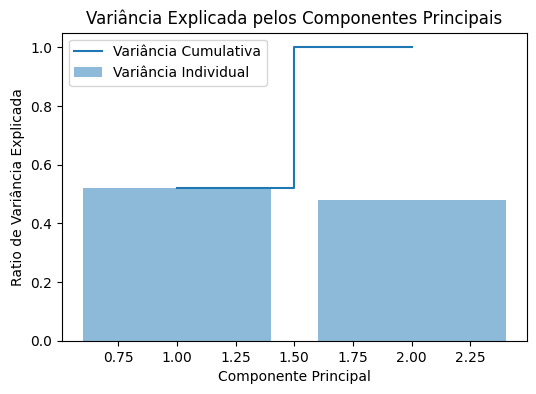

In [52]:
# Plotar variância explicada
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Variância Individual')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Variância Cumulativa')
plt.ylabel('Ratio de Variância Explicada')
plt.xlabel('Componente Principal')
plt.legend(loc='best')
plt.title('Variância Explicada pelos Componentes Principais')
plt.show()

In [53]:
# 5. Reinstanciar PCA com número desejado de componentes (e.g., 1, baseado no gráfico ou % desejada)
pca_final = PCA(n_components=1)
pca_final.fit(X_scaled) # Ajustar novamente (ou usar o já ajustado e selecionar)

# 6. Transformar dados de treino e teste
X_pca_train = pca_final.transform(X_scaled)
# Se houvesse X_test_scaled: X_pca_test = pca_final.transform(X_test_scaled)

print(f"\nDados Originais Escalados (Shape: {X_scaled.shape}):\n", X_scaled[:5])
print(f"\nDados Transformados por PCA (Shape: {X_pca_train.shape}):\n", X_pca_train[:5])
print("\nComponentes Principais (Autovetores):\n", pca_final.components_)


Dados Originais Escalados (Shape: (100, 2)):
 [[ 0.4799911  -0.80495929]
 [ 0.12758337 -1.00821351]
 [-1.60874596 -0.38914033]
 [ 0.70185794 -1.24121543]
 [ 0.43837217  1.04612573]]

Dados Transformados por PCA (Shape: (100, 1)):
 [[ 0.90859714]
 [ 0.80312968]
 [-0.86239141]
 [ 1.37396035]
 [-0.42974666]]

Componentes Principais (Autovetores):
 [[ 0.70710678 -0.70710678]]


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** Redução de dimensionalidade eficaz preservando variância. Remove multicolinearidade (PCs são ortogonais). Pode reduzir ruído (componentes de baixa variância podem ser ruído). Útil para visualização (2 ou 3 PCs).
    *   **Limitações:** **Perda de interpretabilidade:** Os PCs são **combinações lineares das features originais** e raramente têm um significado de negócio claro. **Sensível à escala das features** (requer escalonamento prévio). Assume que variância alta = importância, o que nem sempre é verdade (o sinal pode estar em componentes de baixa variância). É não supervisionado (ignora a variável target).
    *   **Precauções:** **Sempre escalone os dados antes do PCA.** Ajuste (`fit`) apenas no treino. A escolha de `n_components` é crucial (use o gráfico de variância explicada - "cotovelo").
*   **Quais as principais dicas práticas?**
    *   **Use o gráfico da variância explicada cumulativa** para decidir quantos componentes manter (procure um "cotovelo" ou um limiar como 90%, 95%, 99% da variância).
    *   Ótimo para **visualizar dados de alta dimensão** em 2D ou 3D (plotando PC1 vs PC2).
    *   Pode **melhorar o desempenho de algoritmos sensíveis à multicolinearidade** (como Regressão Linear) ou à "maldição da dimensionalidade" (como KNN).
    *   **Não use PCA se a interpretabilidade das features originais for muito importante. Nesse caso, prefira Feature Selection.**

Referências:
- [StatQuest: Análise de Componentes Principais (PCA), Passo a Passo](https://www.youtube.com/watch?v=FgakZw6K1QQ&t=144s)
- [Reconhecimento de Padrões - USP - (PCA) Análise de Componentes Principais](https://www.youtube.com/watch?v=2MySwcqdi2A&list=PLXIcG57UWcHteKpa4IyLqUg46n_t2Bn_F)

#### **2. LDA (Linear Discriminant Analysis - Análise de Discriminante Linear)**


*   **O que é?**
    *   **Motivação:** Reduzir a dimensionalidade especificamente para problemas de **classificação**, encontrando um subespaço que maximiza a separabilidade entre as classes. É uma técnica **supervisionada**.
    *   **Proposta:** Encontrar eixos (Discriminantes Lineares - LDs) que **maximizam a razão entre a variância *entre* classes e a variância *dentro* das classes**.
*   **Qual o seu funcionamento?**
    *   **Pressupostos:** Assume que os dados em cada **classe seguem uma distribuição Gaussiana**. Assume que as **classes têm matrizes de covariância idênticas** (embora possa funcionar razoavelmente bem mesmo se violado). **Funciona melhor com relações lineares**. Escalonamento é frequentemente recomendado.
    *   **Lógica:**
        1.  Calcula a matriz de dispersão *dentro* das classes (Within-class scatter matrix, Sw). Mede o quão espalhados estão os pontos dentro de cada classe.
        2.  Calcula a matriz de dispersão *entre* as classes (Between-class scatter matrix, Sb). Mede o quão separadas estão as médias das classes.
        3.  Resolve um problema de autovalores/autovetores generalizado para a matriz `inv(Sw) * Sb`.
        4.  Os autovetores correspondentes aos maiores autovalores são os Discriminantes Lineares (LDs) que maximizam a separabilidade.
        5.  Ordena os LDs pelos autovalores.
        6.  Seleciona os `k` primeiros LDs. O número máximo de LDs é `min(n_features, n_classes - 1)`.
        7.  Projeta os dados originais nos `k` LDs selecionados.
*   **Como utilizá-lo? (Python com `scikit-learn`)**
  


In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

# Dados de exemplo (Numéricas: N1, N2, N_QuaseConstante; Categóricas: C1, C2)
data = {
    'N1': np.random.rand(100) * 10,
    'N2': np.random.rand(100) * 5 + 2,
    'N_QuaseConstante': [1]*98 + [1.1, 1.2],
    'C1': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'C2': np.random.choice(['X', 'Y'], 100),
    'Target_Class': np.random.randint(0, 3, 100), # Target Categórico (0, 1, 2)
    'Target_Reg': np.random.rand(100) * 50 # Target Numérico
}
df = pd.DataFrame(data)

display(df.head())
display(df.shape)

,N1,N2,N_QuaseConstante,C1,C2,Target_Class,Target_Reg
0,7.588773,3.565870,1.0,B,X,2,40.556147
1,5.184875,5.562157,1.0,A,Y,2,29.480357
2,4.377040,4.796055,1.0,C,Y,2,9.702298
3,5.776577,5.779878,1.0,D,X,0,28.648992
4,5.945869,2.067002,1.0,B,Y,0,11.063211


(100, 7)

In [3]:
# ... (usando X e y categórico do exemplo anterior) ...
X = df[['N1', 'N2']] # Features numéricas
y = df['Target_Class'] # Target categórico


Número máximo de componentes LDA: 2

Dados Originais Escalados (Shape: (100, 2)):
 [[ 0.78690862 -0.56992677]
 [-0.12959163  0.7774762 ]
 [-0.43758361  0.26039191]
 [ 0.09599802  0.92442804]
 [ 0.16054166 -1.58159501]]

Dados Transformados por LDA (Shape: (100, 2)):
 [[-1.05828747 -0.08036496]
 [ 0.67483899 -0.46540611]
 [ 0.54709777  0.08427105]
 [ 0.59868468 -0.7057304 ]
 [-1.28883731  1.00956113]]

Variância explicada pelos discriminantes: [0.94559493 0.05440507]


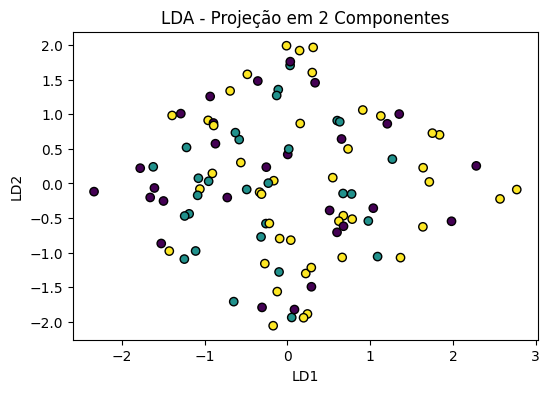

In [6]:
# 1. Escalonar os dados (recomendado para LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Instanciar LDA
# n_components não pode ser maior que min(n_features, n_classes - 1)
n_classes = len(np.unique(y))
n_features = X.shape[1]
max_components = min(n_features, n_classes - 1)
print(f"\nNúmero máximo de componentes LDA: {max_components}")

# Se max_components >= 1, podemos reduzir
if max_components >= 1:
  lda = LinearDiscriminantAnalysis(n_components=max_components) # Usar o máximo possível aqui

  # 3. Ajustar LDA nos dados de treino (requer X e y)
  lda.fit(X_scaled, y)

  # 4. Transformar dados de treino e teste
  X_lda_train = lda.transform(X_scaled)
  # Se houvesse X_test_scaled: X_lda_test = lda.transform(X_test_scaled)

  print(f"\nDados Originais Escalados (Shape: {X_scaled.shape}):\n", X_scaled[:5])
  print(f"\nDados Transformados por LDA (Shape: {X_lda_train.shape}):\n", X_lda_train[:5])
  print("\nVariância explicada pelos discriminantes:", lda.explained_variance_ratio_)

  # Visualização (se n_components=2)
  if max_components >= 2:
        lda_plot = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_scaled, y)
        plt.figure(figsize=(6, 4))
        plt.scatter(lda_plot[:, 0], lda_plot[:, 1], c=y, cmap='viridis', edgecolor='k')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.title('LDA - Projeção em 2 Componentes')
        plt.show()
  elif max_components == 1:
        plt.figure(figsize=(6, 2))
        plt.scatter(X_lda_train[:, 0], np.zeros_like(X_lda_train[:, 0]), c=y, cmap='viridis', edgecolor='k')
        plt.xlabel('LD1')
        plt.yticks([])
        plt.title('LDA - Projeção em 1 Componente')
        plt.show()

else:
  print("\nLDA não aplicável para redução de dimensionalidade (n_classes <= 2 e n_features=1 ou n_classes=1)")


*   **Quais suas vantagens e limitações?**
    *   **Vantagens:** É supervisionado, usa informações das classes para encontrar a melhor projeção para separabilidade. **Muitas vezes supera PCA em tarefas de classificação se as suposições forem razoavelmente atendidas**. Pode funcionar bem mesmo com poucos dados por classe.
    *   **Limitações:** Limitado a `n_classes - 1` componentes, o que pode ser uma redução muito drástica se `n_classes` for pequeno. **Assume normalidade Gaussiana e covariâncias iguais** (sensível a violações dessas premissas). Focado em separabilidade linear.
    *   **Precauções:** **Escalonar os dados é recomendado**. Verifique o número de classes e features para determinar o `n_components` máximo. LDA pode ser usado diretamente como classificador também.
*   **Quais as principais dicas práticas?**
    *   **Use LDA quando o objetivo principal for classificação** e você quiser reduzir a dimensionalidade levando em conta as classes.
    *   É uma ótima alternativa ao PCA **quando as classes são linearmente separáveis** (ou aproximadamente).
    *   **O número máximo de componentes é uma limitação importante a considerar**. Se `n_classes=2`, LDA produzirá no máximo 1 dimensão.
    *   Pode ser muito eficaz como passo de pré-processamento antes de aplicar outros classificadores.

### Conclusão e Considerações Finais



A Preparação de Dados e a Engenharia de Features são tanto uma ciência quanto uma arte. Não existe uma "receita de bolo" única que funcione para todos os problemas. A escolha das técnicas corretas depende profundamente:

1.  **Do Problema de Negócio:** Qual o objetivo? Interpretabilidade é crucial? Qual a métrica de sucesso?
2.  **Dos Dados:** Qual o volume? Quais os tipos de dados (numéricos, categóricos, texto, imagem)? Qual a qualidade (outliers, missing values)? Qual a cardinalidade das features categóricas?
3.  **Do Modelo Escolhido:** Algoritmos diferentes têm sensibilidades diferentes à escala, multicolinearidade, dimensionalidade e tipos de features.

**Dicas Gerais "Game Changer":**

1.  **Iteração é a Chave:** Raramente você acertará na primeira tentativa. Experimente diferentes combinações de escalonamento, encoding, seleção e redução. Use pipelines (`sklearn.pipeline.Pipeline`) para organizar e automatizar esses passos, facilitando a experimentação e evitando data leakage.
2.  **Visualização é Poder:** Antes, durante e depois do pré-processamento, visualize seus dados. Histogramas, boxplots, scatter plots, matrizes de correlação, projeções PCA/LDA ajudam a entender os dados e o efeito das transformações.
3.  **Cuidado com Data Leakage:** A regra de ouro é: qualquer estatística ou parâmetro usado para transformar os dados (médias, desvios padrão, min/max, categorias, componentes PCA/LDA, médias de Target Encoding) deve ser calculado **APENAS** no conjunto de treino e depois aplicado de forma consistente aos conjuntos de validação e teste. Validação cruzada deve ser feita *corretamente*, com o pré-processing dentro de cada fold se ele depender dos dados (como Target Encoding ou PCA ajustado no fold).
4.  **Conhecimento de Domínio:** Converse com especialistas da área. Eles podem fornecer insights valiosos sobre quais features são importantes, como combinar features existentes (Engenharia de Features manual) ou quais relações esperar.
5.  **Simplicidade Primeiro:** Comece com abordagens mais simples (StandardScaler, OHE, Filtros básicos). Se o desempenho não for suficiente, introduza técnicas mais complexas (RobustScaler, Target Encoding, Wrappers, PCA/LDA), mas sempre avaliando o trade-off entre complexidade e ganho de performance.

Dominar a preparação de dados e a engenharia de features é o que separa um modelo mediano de um modelo de alto desempenho e confiável no mundo real. Invista tempo aqui, pois o retorno é quase sempre garantido!

### Apêndice

#### A. Interação entre Features e Limitação dos métodos de Filtro

Ótima pergunta! Explicar o que significa "ignorar interações entre features" é fundamental para entender as limitações dos Métodos Filtro na seleção de features.

Vamos detalhar:

**O que é uma "Interação entre Features"?**

Uma interação ocorre quando o efeito de uma feature (variável preditora) sobre a variável alvo (target) **depende do valor de outra feature**. Em outras palavras, o impacto de uma variável não é constante, mas muda de acordo com o contexto fornecido por outra(s) variável(is). As features, nesse caso, não atuam de forma isolada; seu poder preditivo combinado é diferente (geralmente maior, mas pode ser menor) do que a soma de seus poderes preditivos individuais.

**Exemplos de Interação:**

1.  **Marketing:** O efeito do gasto em publicidade na TV (`Gasto_TV`) nas vendas (`Vendas`) pode ser muito maior se houver também um gasto significativo em publicidade online (`Gasto_Online`) ocorrendo simultaneamente. Sozinho, o `Gasto_TV` pode ter um efeito modesto, mas em *interação* com `Gasto_Online`, o efeito é amplificado.
2.  **Medicina:** Um medicamento A pode ter pouco efeito em reduzir a pressão arterial. Um medicamento B também pode ter pouco efeito. No entanto, tomados *juntos*, eles podem ter um efeito sinérgico e reduzir significativamente a pressão arterial. A eficácia de A *depende* da presença de B.
3.  **Geometria Simples:** Imagine que você quer prever se um ponto (X, Y) está dentro de um quadrado unitário (0 < X < 1 E 0 < Y < 1).
    *   Saber apenas que `0 < X < 1` não é suficiente para garantir que o ponto está dentro do quadrado.
    *   Saber apenas que `0 < Y < 1` também não é suficiente.
    *   É a *interação* (a condição LÓGICA "E") entre `X` e `Y` que define se o ponto está dentro. Uma feature sozinha tem poder preditivo limitado, mas juntas (em interação) elas definem perfeitamente a classe.

**Como os Métodos Filtro Ignoram Interações:**

Os Métodos Filtro avaliam as features com base em suas propriedades estatísticas intrínsecas, geralmente de forma **univariada** (uma feature de cada vez em relação ao target) ou, no máximo, **bivariada** (comparando pares de features, como na correlação, mas focando em *redundância*, não em *poder preditivo conjunto*).

*   **Avaliação Univariada:** Métodos como ANOVA F-test, Chi-Quadrado ou Informação Mútua calculam uma pontuação para cada feature *individualmente*, medindo sua relação direta com o target. Eles não consideram como essa relação pode mudar na presença de outras features. No exemplo do quadrado, tanto X quanto Y individualmente teriam uma pontuação relativamente baixa em relação ao target "dentro/fora", pois nenhum deles sozinhos define a fronteira.
*   **Avaliação de Redundância:** Métodos baseados em correlação olham para pares de features (`X1`, `X2`) para ver se elas carregam informações similares (redundantes). Eles *não* avaliam se a *combinação* de `X1` e `X2` (quando não são redundantes) tem um poder preditivo maior do que a soma de suas partes.

**Consequências de Ignorar Interações:**

1.  **Descarte de Features Valiosas:** Uma feature pode parecer fraca ou irrelevante quando avaliada isoladamente por um método filtro (baixa correlação com o target, baixo score ANOVA/MI). No entanto, essa mesma feature pode ser crucial quando *combinada* com outra. O método filtro pode descartá-la erroneamente.
2.  **Seleção de Subconjunto Subótimo:** O conjunto final de features selecionado pelo filtro pode não ser o melhor para um modelo que *é* capaz de capturar interações (como árvores de decisão, Random Forests, Gradient Boosting, ou modelos lineares com termos de interação explícitos).
3.  **Perda de Poder Preditivo:** Se as interações são importantes para modelar o fenômeno subjacente, ignorá-las levará a um modelo menos preciso.

**Em Resumo:**

Dizer que os métodos filtro "ignoram interações entre features" significa que eles avaliam o mérito de cada feature **isoladamente** (ou em pares para redundância), sem considerar a possibilidade de que o verdadeiro valor preditivo de uma feature só se manifeste ou seja amplificado **em conjunto** com outras features. Eles não conseguem detectar a "sinergia" ou as dependências contextuais entre as variáveis na previsão do alvo. É por isso que métodos Wrapper e Embedded, que avaliam features no contexto de um modelo específico, são geralmente melhores em encontrar subconjuntos de features que funcionam bem juntas.

#### B. DeepDive no código dos Método de Filtros

Okay, vamos mergulhar nos detalhes do trecho de código que usa `SelectKBest`. Este é um exemplo clássico de **Método Filtro** para seleção de features, onde as features são avaliadas com base em testes estatísticos univariados (ou seja, cada feature é avaliada individualmente em relação à variável alvo).

O objetivo geral aqui é **selecionar um número pré-definido (`k`) das features que têm a relação estatística mais forte com a variável alvo (target)**.

```python
# --- Filtros baseados no Target (SelectKBest) ---
# Importações relevantes já feitas: SelectKBest, f_classif, chi2, mutual_info_classif, LabelEncoder
# Dados de exemplo (já criados): df com features N1, N2 (numéricas), C1, C2 (categóricas), Target_Class (categórica)

# --- Cenário 1: Features Numéricas vs Target Categórico (ANOVA F-test) ---

# 1. Escolher a métrica e o número de features (k)
#    SelectKBest: Classe que seleciona features com base nos 'k' maiores scores.
#    score_func=f_classif: Especifica a função de pontuação a ser usada.
#        f_classif: Calcula o teste F de ANOVA (Análise de Variância).
#                   Este teste é adequado para:
#                       - Features de entrada (X): Numéricas
#                       - Variável Alvo (y): Categórica
#                   Ele mede se as médias da feature numérica são significativamente
#                   diferentes entre os grupos definidos pelo target categórico.
#                   Um valor F alto e um p-valor baixo sugerem que a feature ajuda
#                   a discriminar as classes do target.
#    k=1: Queremos selecionar apenas a UMA (k=1) melhor feature numérica
#         com base no score F de ANOVA.
selector_f_classif = SelectKBest(score_func=f_classif, k=1)

# 2. Aplicar o seletor aos dados
#    df[['N1', 'N2']]: Selecionamos apenas as features NUMÉRICAS de entrada.
#    df['Target_Class']: Fornecemos a variável alvo CATEGÓRICA.
#    .fit(X, y): Este método faz o seguinte:
#        a. Para CADA feature em X ('N1' e 'N2'):
#           Calcula o score usando a função especificada (f_classif) em relação a 'y'.
#           Neste caso, calcula o F-score de ANOVA para 'N1' vs 'Target_Class'
#           e para 'N2' vs 'Target_Class'.
#        b. Armazena internamente os scores calculados para todas as features.
#        c. Identifica qual(is) feature(s) tem(êm) os 'k' maiores scores.
#    Importante: O método `fit` NÃO modifica os dados originais (X ou y).
#                Ele apenas calcula e armazena os resultados da análise.
selector_f_classif.fit(df[['N1', 'N2']], df['Target_Class'])

# 3. Analisar os resultados
#    .get_feature_names_out(['N1', 'N2']): Retorna os nomes das features que foram
#                                          SELECIONADAS (as 'k' melhores).
#                                          Passar os nomes originais ajuda a obter
#                                          nomes significativos na saída.
print("\nMelhor feature numérica para Target_Class (ANOVA):",
      selector_f_classif.get_feature_names_out(['N1', 'N2']))

#    .scores_: Atributo que armazena os scores calculados para TODAS as features
#              que foram avaliadas durante o `fit`, na mesma ordem em que foram passadas.
#              Permite ver a pontuação de cada feature, não apenas da(s) selecionada(s).
print("Scores ANOVA:", selector_f_classif.scores_)

# --- Cenário 2: Features Categóricas vs Target Categórico (Chi2) ---

# 4. Pré-processamento NECESSÁRIO para Chi2
#    O teste Qui-Quadrado (Chi2) opera sobre tabelas de contingência, comparando
#    frequências observadas com frequências esperadas sob a hipótese de independência.
#    Ele requer que as entradas sejam NUMÉRICAS e NÃO-NEGATIVAS.
#    Nossas features 'C1' e 'C2' são strings ('A', 'B', 'X', 'Y', etc.).
#    LabelEncoder: Converte cada categoria string em um número inteiro (0, 1, 2...).
#                  É uma forma rápida de obter a representação numérica necessária.
#                  NOTA: Embora introduza uma ordem artificial (que Chi2 não usa),
#                        é comum usá-lo aqui para aplicar o teste em filtros.
#                        OneHotEncoding também funcionaria, mas geraria mais colunas
#                        e exigiria aplicar Chi2 a cada coluna binária resultante.
le = LabelEncoder()
df['C1_Encoded'] = le.fit_transform(df['C1'])
df['C2_Encoded'] = le.fit_transform(df['C2'])

# 5. Escolher a métrica e k para features categóricas
#    SelectKBest: Mesma classe de antes.
#    score_func=chi2: Especifica a função de pontuação Qui-Quadrado.
#        chi2: Adequado para:
#                - Features de entrada (X): Categóricas (codificadas como numéricas não-negativas)
#                - Variável Alvo (y): Categórica
#              Testa a hipótese nula de que a feature e o target são independentes.
#              Um valor Chi2 alto e um p-valor baixo sugerem uma dependência
#              entre a feature e o target (ou seja, a feature é relevante).
#    k=1: Queremos selecionar a UMA melhor feature categórica (codificada).
selector_chi2 = SelectKBest(score_func=chi2, k=1)

# 6. Aplicar o seletor aos dados CATEGÓRICOS CODIFICADOS
#    df[['C1_Encoded', 'C2_Encoded']]: Usamos as versões NUMÉRICAS das features categóricas.
#    df['Target_Class']: O target ainda é o mesmo (categórico).
#    .fit(X, y): Calcula o score Chi2 para 'C1_Encoded' vs 'Target_Class'
#                e para 'C2_Encoded' vs 'Target_Class'. Armazena os scores
#                e identifica a feature com o maior score (top k=1).
selector_chi2.fit(df[['C1_Encoded', 'C2_Encoded']], df['Target_Class'])

# 7. Analisar os resultados para Chi2
#    .get_feature_names_out(['C1_Encoded', 'C2_Encoded']): Mostra qual feature codificada foi selecionada.
print("\nMelhor feature categórica para Target_Class (Chi2):",
       selector_chi2.get_feature_names_out(['C1_Encoded', 'C2_Encoded']))
#    .scores_: Mostra os scores Chi2 para ambas as features codificadas.
print("Scores Chi2:", selector_chi2.scores_)

# --- Cenário 3: Informação Mútua (Exemplo de uso direto da função de score) ---

# 8. Calcular Scores de Informação Mútua
#    mutual_info_classif: Calcula a Informação Mútua entre cada feature e o target discreto.
#        Informação Mútua (MI): Mede a redução na incerteza sobre o target 'y'
#                                ao conhecer o valor da feature 'X'.
#                                Vantagens:
#                                   - Captura dependências NÃO LINEARES.
#                                   - Pode ser usada para features numéricas ou categóricas.
#                                   - Valor >= 0. Zero significa independência.
#    df[['N1', 'N2', 'C1_Encoded', 'C2_Encoded']]: Passamos todas as features (numéricas e categóricas codificadas).
#    df['Target_Class']: O target categórico.
#    discrete_features=[False, False, True, True]: Um *hint* importante para a função.
#        Indica quais colunas em X devem ser tratadas como discretas/categóricas.
#        'N1', 'N2' são contínuas (False).
#        'C1_Encoded', 'C2_Encoded' são discretas (True).
#        Isso ajuda o algoritmo a usar os estimadores corretos de MI.
#    A função retorna diretamente um array com os scores MI para cada feature.
mi_scores = mutual_info_classif(df[['N1', 'N2', 'C1_Encoded', 'C2_Encoded']], df['Target_Class'], discrete_features=[False, False, True, True])

# 9. Exibir os scores MI
#    Colocamos os scores em uma Série Pandas para melhor visualização com os nomes das features.
print("\nScores de Informação Mútua (vs Target_Class):\n", pd.Series(mi_scores, index=['N1', 'N2', 'C1_Encoded', 'C2_Encoded']))
#    NOTA: Aqui, apenas calculamos os scores. Se quiséssemos usar MI dentro do
#          SelectKBest, faríamos: SelectKBest(score_func=mutual_info_classif, k=...)
#          e depois o `.fit()`. Usar a função diretamente é útil para apenas
#          ver os scores e decidir um limiar manualmente, ou para usar em cenários
#          onde os hints como `discrete_features` são necessários e SelectKBest
#          pode não passá-los diretamente (embora versões recentes possam ter melhorado isso).
```

**Em Resumo, o que o código faz:**

1.  **Instancia `SelectKBest`**: Prepara um objeto para selecionar as `k` melhores features.
2.  **Especifica `score_func`**: Define *como* a "qualidade" ou "relevância" de uma feature será medida em relação ao target. A escolha da função (`f_classif`, `chi2`, `mutual_info_classif`, etc.) depende dos **tipos de dados** da feature e do target.
3.  **Especifica `k`**: Define *quantas* features serão selecionadas.
4.  **Executa `.fit(X, y)`**: Calcula os scores para todas as features em `X` usando a `score_func` especificada em relação a `y` e armazena esses scores.
5.  **Interpreta os Resultados**: Usa métodos como `.get_feature_names_out()` para ver as features selecionadas e o atributo `.scores_` para inspecionar as pontuações calculadas para todas as features avaliadas.
6.  **(Implícito)** O próximo passo *seria* usar `.transform(X)` no objeto `selector` ajustado (`fit`) para criar um novo conjunto de dados contendo apenas as `k` features selecionadas. Ex: `X_new = selector_f_classif.transform(df[['N1', 'N2']])`.

Este processo permite filtrar rapidamente as features que, individualmente, mostram a maior relação estatística com a variável alvo, antes de passar para etapas de modelagem mais complexas.

#### C. DeepDive no RFE com Regressão Logística

**O Cenário:**

Você tem o código:

```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Suponha que X_train e y_train existem
# X_train tem múltiplas features (colunas)
# y_train é o target (geralmente binário para Regressão Logística)

estimator_lr = LogisticRegression(solver='liblinear') # O modelo base
selector_rfe = RFE(estimator=estimator_lr, n_features_to_select=1, step=1)
selector_rfe.fit(X_train, y_train)

# Resultado de interesse: Qual feature foi selecionada (se n_features_to_select=1)?
print("Features selecionadas por RFE:", X_train.columns[selector_rfe.support_])
print("Ranking das features:", selector_rfe.ranking_)
```

**O que o RFE faz com a Regressão Logística?**

RFE é um método **Wrapper** de seleção de features. Isso significa que ele usa um modelo de aprendizado de máquina (o `estimator`) como parte do seu processo para avaliar a importância das features. Ele funciona de forma **recursiva e eliminatória**:

1.  **Modelo Base:** O RFE precisa de um modelo que, após ser treinado, forneça alguma medida de importância para cada feature. A Regressão Logística é adequada porque, ao ser treinada, ela calcula **coeficientes (pesos)** para cada feature de entrada.

2.  **Interpretação dos Coeficientes:** Na Regressão Logística, o coeficiente de uma feature indica o quanto o *log-odds* da classe positiva aumenta (ou diminui, se negativo) para cada unidade de aumento na feature, mantendo as outras constantes. A **magnitude (valor absoluto)** desses coeficientes é frequentemente usada como um proxy para a importância da feature no modelo:
    *   Um coeficiente com **grande valor absoluto** (positivo ou negativo) sugere que a feature tem uma forte influência na previsão do modelo.
    *   Um coeficiente com **valor absoluto próximo de zero** sugere que a feature tem pouca influência na previsão *daquele modelo específico treinado com aquele conjunto de features*.

3.  **O Processo Recursivo de Eliminação:**
    *   **Passo Inicial (Iteração 1):**
        *   O RFE pega **todas** as features iniciais em `X_train`.
        *   Ele treina o modelo `LogisticRegression` (`estimator_lr`) usando todas essas features e o target `y_train`.
        *   Após o treino, ele extrai os **coeficientes** aprendidos pelo modelo (`estimator_lr.coef_`).
        *   Ele calcula o **valor absoluto** de cada coeficiente.
        *   Ele identifica a feature que possui o **menor valor absoluto de coeficiente**. Essa feature é considerada a "menos importante" *nesta iteração*.
    *   **Passo de Eliminação (Iteração 1):**
        *   A feature identificada como a menos importante é **removida permanentemente** do conjunto de features.
        *   O `ranking_` dessa feature é definido (por exemplo, se havia 10 features, o ranking da primeira eliminada seria 10).
    *   **Passo Recursivo (Iteração 2):**
        *   O RFE agora tem um conjunto de features menor (todas as iniciais menos uma).
        *   Ele **retreina** o modelo `LogisticRegression` usando **apenas as features restantes** e o target `y_train`.
        *   Após o treino, ele extrai os novos coeficientes (que provavelmente serão diferentes dos da Iteração 1, pois o conjunto de features mudou).
        *   Ele calcula os valores absolutos dos novos coeficientes.
        *   Ele identifica a feature (dentre as *restantes*) com o menor valor absoluto de coeficiente.
        *   Essa feature é removida, e seu ranking é definido (ex: 9).
    *   **Repetição:** O processo (retreinar -> obter coeficientes -> encontrar o menor absoluto -> eliminar) continua.
    *   **Condição de Parada:** O processo para quando o número de features restantes atinge o valor especificado em `n_features_to_select` (no seu caso, 1).
    *   **Resultado Final:** As features que *não* foram eliminadas são consideradas as "melhores" ou "selecionadas" pelo RFE. Se `n_features_to_select=1`, apenas uma feature sobrará. O `ranking_` indicará a ordem de eliminação (1 para as selecionadas, 2 para a primeira eliminada antes das selecionadas, e assim por diante).

**No seu caso específico (`n_features_to_select=1`):**

O RFE treinará a Regressão Logística várias vezes. Em cada etapa, ele removerá a feature cujo coeficiente (em valor absoluto) for o menor *naquele treinamento específico*. Ele continuará removendo features até que apenas uma reste. Essa única feature restante é a que, segundo esse processo iterativo baseado nos coeficientes da Regressão Logística, foi considerada a mais importante (ou, mais precisamente, a última a ser considerada "menos importante").

**Considerações Importantes:**

*   **Escalonamento:** Os coeficientes da Regressão Logística são muito sensíveis à escala das features. Se as features tiverem escalas muito diferentes (ex: idade 20-80 vs salário 50000-200000), a feature com maior escala pode ter um coeficiente artificialmente menor, mesmo sendo importante. **É crucial escalar (padronizar ou normalizar) seus dados `X_train` *antes* de aplicar RFE com Regressão Logística** para que os coeficientes sejam comparáveis.
*   **Multicolinearidade:** Se houver features altamente correlacionadas, os coeficientes da Regressão Logística podem se tornar instáveis. O RFE pode eliminar aleatoriamente uma das features correlacionadas, mesmo que ambas sejam importantes.
*   **`step`:** O parâmetro `step=1` significa que apenas uma feature é removida por iteração. Você pode remover mais de uma para acelerar o processo (`step > 1`), mas geralmente `step=1` é mais granular.
*   **Modelo Base:** O resultado do RFE depende totalmente do modelo base (`estimator`). Usar um RandomForestClassifier no RFE resultaria em um processo diferente, baseado na feature importance calculada pelo Random Forest, e não nos coeficientes da Regressão Logística.

Em resumo, o RFE com Regressão Logística usa a magnitude dos coeficientes aprendidos em treinamentos sucessivos como critério para eliminar iterativamente as features consideradas menos influentes, até restar o número desejado.

#### D. Deep Dive: Regularização L1 (Lasso) como Método Incorporado de Seleção de Features

A regularização L1, mais conhecida pelo nome do algoritmo que a implementa em regressão linear (**Lasso** - Least Absolute Shrinkage and Selection Operator), é uma técnica poderosa e elegante que atua simultaneamente como um método de **regularização** (prevenindo overfitting) e um método **incorporado (embedded)** de **seleção de features**.

Vamos mergulhar nos detalhes:

**1. O Problema: Overfitting e Alta Dimensionalidade**

*   **Overfitting:** Modelos complexos (especialmente aqueles com muitas features, como modelos lineares com muitos coeficientes) podem se ajustar excessivamente aos dados de treinamento, capturando ruído e padrões espúrios. Isso leva a um desempenho ruim em dados não vistos.
*   **Alta Dimensionalidade:** Quando temos um grande número de features (p >> n, ou simplesmente muitas features), os **modelos lineares** podem se tornar instáveis, difíceis de interpretar, e computacionalmente caros. Muitas dessas features podem ser redundantes ou irrelevantes.

**2. A Solução: Regularização**

A ideia da regularização é adicionar um termo de **penalidade à função de custo (ou objetivo) do modelo**. Essa penalidade desencoraja o modelo de atribuir pesos (coeficientes) muito grandes às features, forçando-o a ser mais "simples".

*   **Função de Custo Padrão (Ex: Regressão Linear - Mínimos Quadrados):**
    `Custo = Σ(y_i - ŷ_i)² = Σ(y_i - (β₀ + β₁x₁ᵢ + ... + βₚxₚᵢ))²`
    O objetivo é encontrar os coeficientes (β) que minimizam esse erro quadrático.

*   **Função de Custo com Regularização L1 (Lasso):**
    `Custo_L1 = Σ(y_i - ŷ_i)² + α * Σ|βⱼ|` (soma para j de 1 a p, excluindo o intercepto β₀)

    *   **Termo de Penalidade L1:** `α * Σ|βⱼ|` é a soma dos **valores absolutos** dos coeficientes, multiplicada por um hiperparâmetro `α` (alpha) ou `λ` (lambda).
    *   **Hiperparâmetro `α`:** Controla a **força** da regularização.
        *   `α = 0`: Sem regularização (voltamos aos Mínimos Quadrados comuns).
        *   `α > 0`: Penaliza coeficientes grandes.
        *   `α → ∞`: Penalização muito forte, força todos os coeficientes `βⱼ` (j>0) a serem zero.

**3. O Mecanismo Mágico: Por que L1 Seleciona Features (Gera Esparsidade)?**

Esta é a parte crucial que diferencia L1 (Lasso) de L2 (Ridge Regression).

*   **A Penalidade Absoluta:** A função de valor absoluto `|βⱼ|` tem um "ponto" ou "quina" em `βⱼ = 0`. Matematicamente, sua derivada não é definida em zero (é -1 para β<0 e +1 para β>0).
*   **O Processo de Otimização:** Durante o treinamento, o algoritmo tenta minimizar a `Custo_L1`. Isso envolve encontrar um equilíbrio entre minimizar o erro de ajuste aos dados (primeiro termo) e minimizar a penalidade (segundo termo).
*   **O Efeito da "Quina":** Por causa da natureza da penalidade `|βⱼ|`, quando o algoritmo de otimização (como descida de gradiente coordenada) tenta reduzir o custo total, ele frequentemente descobre que a melhor maneira de fazer isso é definir alguns coeficientes **exatamente iguais a zero**. É "mais barato" (em termos de redução do custo total) zerar completamente um coeficiente de uma feature pouco útil do que apenas reduzi-lo a um valor muito pequeno (como faria a regularização L2).
*   **Interpretação Geométrica (Comparando com L2):**
    *   Minimizar o Custo_L1 é equivalente a minimizar o erro quadrático sujeito a uma restrição `Σ|βⱼ| ≤ t` (para algum `t` relacionado a `α`). Esta região de restrição no espaço dos coeficientes tem a forma de um **diamante** (ou hiper-diamante em dimensões maiores).
    *   A regularização L2 (Ridge) tem uma penalidade `α * Σβⱼ²`, que corresponde a uma restrição `Σβⱼ² ≤ t`. Esta região de restrição é uma **esfera** (ou hiperesfera).
    *   As curvas de nível da função de erro quadrático são elipses. A solução ótima ocorre onde uma elipse de erro toca a região de restrição. É muito mais provável que a elipse toque o diamante *exatamente em um vértice* (onde um ou mais coeficientes são zero) do que toque a esfera em um ponto onde um coeficiente seja exatamente zero.

*   **Esparsidade:** O resultado final é um **modelo esparso**, onde muitos coeficientes são exatamente zero.
*   **Seleção de Features:** Se um coeficiente `βⱼ` é zero, isso significa que a feature `xⱼ` correspondente **não tem impacto** no modelo final. Ela foi efetivamente **selecionada para fora** (eliminada) pelo processo de regularização L1.

**4. Como Utilizar L1 para Seleção de Features na Prática (Python com `scikit-learn`)**

*   **Passo 1: Escalonamento dos Dados (CRUCIAL!)**
    *   A penalidade L1 depende diretamente da magnitude dos coeficientes. **A magnitude dos coeficientes, por sua vez, depende da escala das features**. Features com escalas maiores terão coeficientes menores (para o mesmo efeito), e vice-versa.
    *   Para que a penalidade seja aplicada de forma justa a todas as features, **você DEVE escalonar (padronizar) suas features** antes de aplicar Lasso ou Regressão Logística com L1. `StandardScaler` é a escolha comum.
    ```python
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test) # Usar o mesmo scaler do treino!
    ```

*   **Passo 2: Escolher o Modelo e Treinar**
    *   **Para Regressão:** Use `Lasso` ou `LassoCV`. `LassoCV` usa validação cruzada interna para encontrar o melhor valor de `α`.
      ```python
      from sklearn.linear_model import LassoCV

      # LassoCV testa vários alphas e escolhe o melhor via CV
      lasso_cv = LassoCV(cv=5, random_state=42, n_jobs=-1) # cv=5 -> 5-fold CV
      lasso_cv.fit(X_train_scaled, y_train)

      print(f"Melhor alpha encontrado: {lasso_cv.alpha_}")
      print("Coeficientes Lasso:", lasso_cv.coef_)
      ```
    *   **Para Classificação:** Use `LogisticRegression` com `penalty='l1'`. É importante notar que nem todos os `solver`s suportam L1. `'liblinear'` (bom para datasets menores) e `'saga'` (bom para datasets maiores) são as opções comuns. `LogisticRegressionCV` também pode ser usada para encontrar o `C` ótimo (que é o inverso de `α`, `C=1/α`).
      ```python
      from sklearn.linear_model import LogisticRegressionCV

      # C é o inverso da força de regularização (C baixo = alpha alto = regularização forte)
      # Cs=10 testa 10 valores de C logaritmicamente espaçados
      # solver='liblinear' suporta L1
      logreg_l1_cv = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear',
                                          random_state=42, n_jobs=-1)
      logreg_l1_cv.fit(X_train_scaled, y_train)

      print(f"Melhor C encontrado: {logreg_l1_cv.C_[0]}") # C_ é um array
      # Coeficientes para cada classe (se multiclasse) ou um conjunto (se binário)
      print("Coeficientes LogReg L1:", logreg_l1_cv.coef_)
      ```

*   **Passo 3: Identificar Features Selecionadas**
    *   Após o treinamento, as features com coeficientes **diferentes de zero** são as selecionadas.
      ```python
      import numpy as np
      import pandas as pd

      # Exemplo com LassoCV
      selected_features_mask = lasso_cv.coef_ != 0
      selected_features_names = pd.DataFrame(X_train).columns[selected_features_mask] # Assumindo X_train é DataFrame

      print("\nFeatures selecionadas pelo Lasso:")
      print(selected_features_names)
      print(f"Número de features selecionadas: {np.sum(selected_features_mask)}")

      # Exemplo com LogisticRegressionCV (binária)
      selected_features_mask_logreg = logreg_l1_cv.coef_[0] != 0 # [0] para classe binária
      selected_features_names_logreg = pd.DataFrame(X_train).columns[selected_features_mask_logreg]

      print("\nFeatures selecionadas pela Regressão Logística L1:")
      print(selected_features_names_logreg)
      print(f"Número de features selecionadas: {np.sum(selected_features_mask_logreg)}")
      ```

*   **Passo 4 (Opcional): Usar como Passo de Seleção para Outro Modelo**
    *   Você pode usar L1 puramente como um passo de *feature selection* e depois treinar um modelo diferente (talvez mais complexo ou um que não suporte L1) apenas com as features selecionadas. `SelectFromModel` é útil aqui.
      ~~~~python
      from sklearn.feature_selection import SelectFromModel
      from sklearn.ensemble import RandomForestClassifier # Exemplo de modelo final

      # Usar o modelo L1 já treinado (lasso_cv ou logreg_l1_cv)
      # threshold=-np.inf garante que qualquer coeficiente não zero seja selecionado
      # Poderia usar threshold="median" ou um valor específico se quisesse ser mais agressivo
      selector = SelectFromModel(estimator=lasso_cv, prefit=True, threshold=-np.inf) # prefit=True pois já treinamos

      X_train_selected = selector.transform(X_train_scaled)
      X_test_selected = selector.transform(X_test_scaled)

      print(f"\nShape original: {X_train_scaled.shape}")
      print(f"Shape após SelectFromModel com Lasso: {X_train_selected.shape}")

      # Agora treinar outro modelo com os dados selecionados
      # rf = RandomForestClassifier(random_state=42)
      # rf.fit(X_train_selected, y_train)
      # ... avaliar rf ...
      ~~~~

**5. Vantagens da Seleção de Features com L1:**

*   **Automática e Incorporada:** A seleção ocorre durante o treinamento do modelo, sem necessidade de um passo separado como nos métodos Wrapper.
*   **Eficiência Computacional:** Geralmente mais rápido que métodos Wrapper que treinam múltiplos modelos.
*   **Esparsidade:** Produz modelos mais simples, potencialmente mais interpretáveis e que podem generalizar melhor, especialmente em alta dimensão.
*   **Lida com Alta Dimensionalidade:** Funciona bem mesmo quando o número de features é maior que o número de amostras (p > n).

**6. Limitações e Precauções:**

*   **Sensibilidade à Escala:** **Fundamental** escalar os dados antes de usar L1.
*   **Features Correlacionadas:** Se um grupo de features é altamente correlacionado, Lasso tende a selecionar **apenas uma** delas (quase arbitrariamente) e zerar as outras. Isso pode não ser ideal se todas as features correlacionadas tiverem alguma importância. Ridge (L2) tende a encolher os coeficientes de features correlacionadas juntas, enquanto Elastic Net (combinação de L1 e L2) oferece um meio-termo.
*   **Escolha de `α` (ou `C`):** O desempenho e o grau de esparsidade dependem fortemente da escolha do hiperparâmetro de regularização. Use validação cruzada (`LassoCV`, `LogisticRegressionCV`) para encontrar um valor ótimo.
*   **Não Garante Melhor Modelo Preditivo:** Embora ótimo para seleção e esparsidade, um modelo Lasso pode não ter o melhor desempenho preditivo puro comparado a Ridge ou Elastic Net, especialmente se muitas features contribuem um pouco para o resultado (Lasso pode zerá-las).
*   **Limitado a Modelos com Coeficientes:** Funciona nativamente com modelos lineares (Regressão Linear, Logística, SVM Linear). Para outros modelos (ex: árvores), a seleção é feita por outros mecanismos (como feature importance).

**Conclusão:**

A regularização L1 (Lasso) é uma ferramenta extremamente valiosa no arsenal de um Cientista de Dados. Ela oferece uma maneira eficiente e matematicamente elegante de combater o overfitting e realizar a seleção de features simultaneamente, simplesmente adicionando um termo de penalidade à função de custo. Ao forçar coeficientes de features menos relevantes a se tornarem exatamente zero, ela produz modelos esparsos e ajuda a identificar os preditores mais importantes em conjuntos de dados, especialmente aqueles com alta dimensionalidade. Lembre-se sempre da importância do escalonamento e do ajuste do hiperparâmetro `α` via validação cruzada.

---


**A regularização lasso é útil apenas para modelos lineares ou também é útili para modelos não lineares(na perspectiva de feature selection)?**

A resposta curta é: **A regularização Lasso (L1) é inerentemente ligada a modelos lineares (como Regressão Linear e Logística), mas seus resultados *podem* ser usados como um passo de pré-processamento (um método filtro sofisticado) para selecionar features *antes* de treinar um modelo não linear.** No entanto, isso vem com ressalvas importantes.

Vamos detalhar:

1.  **Lasso e Modelos Lineares (Aplicação Direta):**
    *   Como vimos, Lasso funciona adicionando uma penalidade `α * Σ|βⱼ|` à função de custo de um modelo linear.
    *   Essa penalidade força os coeficientes (`βⱼ`) de features menos importantes (na perspectiva *linear*) a se tornarem exatamente zero.
    *   A seleção de features aqui é um **resultado direto** do processo de otimização do *modelo linear regularizado*. As features com `βⱼ ≠ 0` são as "selecionadas" por esse modelo.

2.  **Lasso como Filtro para Modelos Não Lineares (Aplicação Indireta):**
    *   Modelos não lineares (Árvores de Decisão, Random Forests, Gradient Boosting, SVMs não lineares, Redes Neurais) **não possuem coeficientes lineares `βⱼ`** da mesma forma. Eles capturam relações complexas e não lineares de maneiras diferentes (divisões em árvores, transformações de kernel em SVMs, ativações não lineares em redes neurais).
    *   Portanto, você **não pode aplicar diretamente** a penalidade L1 da mesma forma durante o treinamento de, por exemplo, um Random Forest.
    *   **PORÉM**, você pode usar um modelo linear com Lasso como uma **etapa preliminar de seleção de features**:
        *   **Passo 1:** Pegue seu conjunto de dados completo (features `X`, target `y`).
        *   **Passo 2:** **Escale** as features `X` (importante para Lasso!).
        *   **Passo 3:** Treine um modelo `Lasso` (para regressão) ou `LogisticRegression(penalty='l1')` (para classificação) nos dados escalados. Use `LassoCV` ou `LogisticRegressionCV` para encontrar um bom `α` (ou `C`).
        *   **Passo 4:** Identifique as features cujos coeficientes **não foram zerados** pelo modelo L1.
        *   **Passo 5:** Crie um novo conjunto de dados `X_selected` contendo **apenas** as features selecionadas no Passo 4.
        *   **Passo 6:** Treine seu modelo **não linear** (ex: RandomForestClassifier, XGBoost, etc.) usando `X_selected` e `y`.

3.  **Vantagens de Usar Lasso como Filtro para Modelos Não Lineares:**
    *   **Redução de Dimensionalidade:** Pode reduzir drasticamente o número de features, especialmente em datasets muito largos (muitas colunas). Isso pode acelerar o treinamento do modelo não linear subsequente.
    *   **Remoção de Ruído Linear:** Elimina features que não têm nem mesmo uma relação linear útil com o target, o que *pode* (mas não garante) ajudar o modelo não linear.
    *   **Simplicidade Relativa:** Pode ser computacionalmente mais barato do que usar métodos wrapper com o modelo não linear (que exigiriam treinar o modelo não linear muitas vezes).

4.  **Desvantagens e Riscos CRUCIAIS:**
    *   **Viés Linear na Seleção (O Maior Risco):** Lasso seleciona features com base em sua importância para explicar a variância (ou separar classes) de forma **linear**. Uma feature pode ter uma relação linear fraca (e ser descartada por Lasso), mas ter uma **relação não linear muito forte** que seria perfeitamente capturada por um Random Forest ou Rede Neural. Ao usar Lasso como filtro, **você corre um risco significativo de descartar features que são, na verdade, muito importantes para o modelo não linear.**
    *   **Ignora Interações Complexas:** Modelos não lineares são bons em capturar interações entre features (`feature1` só é importante quando `feature2` tem um certo valor). Lasso, sendo linear (sem termos de interação explícitos), geralmente falha em reconhecer a importância de features que só brilham em interações. Você pode descartar uma feature crucial para uma interação importante.
    *   **Subconjunto Não Ótimo para o Modelo Não Linear:** O conjunto de features ideal para um modelo linear (Lasso) raramente é o conjunto ideal para um modelo não linear. A seleção feita por Lasso não está otimizada para a forma como o modelo não linear "vê" os dados.

5.  **Alternativas Melhores para Seleção de Features com Modelos Não Lineares:**
    *   **Feature Importance Intrínseca:** Modelos baseados em árvores (Random Forest, Gradient Boosting) calculam suas próprias métricas de importância de feature (ex: redução média de impureza Gini, ou "feature_importances_" no scikit-learn). Usar essas importâncias *do próprio modelo não linear* é geralmente mais relevante. (Cuidado: a importância baseada em impureza pode ter vieses).
    *   **Permutation Importance:** Uma técnica mais robusta e model-agnóstica. Depois de treinar o modelo não linear, você embaralha aleatoriamente os valores de uma feature e mede o quanto o desempenho do modelo cai. Features que causam uma queda maior são mais importantes *para aquele modelo específico*.
    *   **Métodos Wrapper com o Modelo Não Linear:** Usar RFE ou Sequential Feature Selector *tendo o próprio modelo não linear como estimador*. Isso seleciona o subconjunto que funciona melhor *para aquele modelo*, mas é computacionalmente muito caro.
    *   **Seleção Baseada em Conhecimento de Domínio:** Muitas vezes a forma mais eficaz.

**Conclusão:**

Embora tecnicamente possível usar Lasso como um passo de filtragem antes de um modelo não linear, **não é geralmente a abordagem recomendada ou mais eficaz**. Você introduz um forte **viés linear** no processo de seleção, arriscando descartar features que são cruciais para o poder preditivo do modelo não linear.

É preferível usar métodos de seleção que estejam mais alinhados com a natureza do modelo não linear que você pretende usar, como as importâncias calculadas pelo próprio modelo, permutation importance, ou wrapper methods (se o custo computacional permitir), combinados com um bom conhecimento do domínio do problema. Lasso como filtro pode ser um último recurso ou um primeiro passo rápido em datasets *extremamente* grandes, mas sempre com a consciência de suas limitações significativas nesse contexto.

#### E. Vieses na Feature Importance do modelos de Árvore

Você fez uma observação extremamente importante! A afirmação de que as importâncias de features baseadas em árvores (especificamente a métrica padrão **Mean Decrease Impurity - MDI**, também conhecida como "Gini Importance" ou "Feature Importance" no scikit-learn) podem ser enviesadas é verdadeira e crucial de se entender.

Vamos desmembrar o porquê:

**1. Como Funciona a Importância Baseada em Impureza (MDI)?**

*   **Construção da Árvore:** Árvores de decisão (e, por extensão, florestas como Random Forest e Gradient Boosting) constroem-se fazendo divisões (splits) nos nós. A cada nó, o algoritmo avalia várias features e vários pontos de divisão (ou categorias) para encontrar a divisão que resulta na **maior redução de impureza** (medida por Gini ou Entropia) nos nós filhos resultantes.
*   **Cálculo da Importância:** A importância de uma feature (segundo MDI) é calculada como a **soma total da redução de impureza** proporcionada por todas as divisões feitas *naquela feature específica*, em *todas as árvores* da floresta. Geralmente, isso é normalizado para que a soma das importâncias de todas as features seja 1.
*   **Intuição:** Features que são usadas com frequência, especialmente no topo da árvore (afetando mais amostras), e que levam a divisões "puras" (grande redução de impureza), recebem uma pontuação de importância mais alta.

**2. O Viés para Features Numéricas (Contínuas)**

*   **Mais Oportunidades de Divisão:** Para uma feature numérica, uma árvore pode testar *muitos* pontos de divisão potenciais (thresholds). Por exemplo, para a feature "Idade", ela pode testar `Idade < 25`, `Idade < 30`, `Idade < 30.5`, etc.
*   **Comparação com Categóricas de Baixa Cardinalidade:** Para uma feature categórica com poucas categorias (ex: 'Gênero' com 'Masculino', 'Feminino', após One-Hot Encoding, talvez 'Gênero_Masculino = 0/1'), há apenas *um* ponto de divisão óbvio por coluna OHE. Mesmo com suporte nativo a categóricas, o número de *maneiras* de dividir 2 ou 3 categorias é muito limitado comparado às dezenas ou centenas de limiares testáveis para uma variável numérica.
*   **O Resultado do Viés:** Como a feature numérica oferece muito mais "chances" (pontos de divisão) de ser selecionada em cada nó, ela tem uma probabilidade maior de ser escolhida para uma divisão, mesmo que seu poder preditivo real não seja superior ao de uma feature categórica. O algoritmo pode encontrar um limiar que, por acaso ou devido a flutuações nos dados de treino, produz uma boa redução de impureza *naquele momento*. Essa maior frequência de seleção infla artificialmente sua pontuação total de MDI.

**3. O Viés para Features Categóricas de Alta Cardinalidade**

*   **O Problema da Cardinalidade:** Considere uma feature como 'CEP' (Zip Code) ou 'ID de Usuário', que pode ter milhares de valores únicos.
*   **Muitas Opções de Particionamento:** Mesmo com tratamento categórico inteligente (como em LightGBM ou CatBoost, que agrupam categorias), uma feature com muitas categorias oferece um número vasto de maneiras de particionar os dados. A árvore pode testar divisões como "CEP está em {10001, 10002, 10005} vs. outros", ou "ID de Usuário < 5000 vs. >= 5000" (se tratada numericamente após encoding inadequado), ou outras combinações.
*   **Facilidade de Overfitting Local:** Com tantas opções de divisão, é mais fácil para o algoritmo encontrar uma divisão (baseada em categorias específicas ou grupos delas) que **separa perfeitamente um pequeno subconjunto dos dados de *treinamento***, puramente por acaso. Isso levará a uma grande redução de impureza *para aquela divisão específica* no conjunto de treino.
*   **O Resultado do Viés:** Essas grandes (mas potencialmente espúrias e não generalizáveis) reduções de impureza obtidas no treino são somadas, inflando a pontuação MDI da feature de alta cardinalidade. Essencialmente, features com alta cardinalidade têm mais flexibilidade para "memorizar" ou se ajustar ao ruído específico dos dados de treinamento.

**Por Que Isso Acontece Fundamentalmente?**

O MDI reflete o quão útil uma feature foi para **ajustar o modelo aos dados de *treinamento***. Ele mede a qualidade das divisões *na amostra usada para construir as árvores*. Features que oferecem mais flexibilidade de divisão (numéricas e de alta cardinalidade) têm mais chances de encontrar divisões que *parecem* boas nos dados de treinamento, mesmo que essas divisões não generalizem bem para dados não vistos.

**Consequências do Viés:**

*   Você pode superestimar a importância de features numéricas ou de alta cardinalidade.
*   Você pode subestimar a importância de features categóricas de baixa cardinalidade que são genuinamente preditivas.
*   Sua seleção de features baseada puramente em MDI pode ser enganosa.

**Soluções e Alternativas Mais Robustas:**

1.  **Permutation Importance (Importância por Permutação):**
    *   **Como Funciona:** Depois de treinar o modelo, pegue um conjunto de dados separado (validação ou teste). Meça o desempenho do modelo (ex: Acurácia, AUC, R²). Em seguida, embaralhe aleatoriamente os valores de *uma única feature* nesse conjunto de dados e remeça o desempenho. A queda no desempenho indica a importância daquela feature.
    *   **Por que é Melhor:** Mede diretamente o quanto o modelo *depende* da feature para fazer previsões corretas em dados *não vistos*. Não depende de como a árvore foi construída ou da impureza, eliminando o viés de cardinalidade/tipo. É considerada a abordagem mais confiável.
    *   **Desvantagem:** Computacionalmente mais cara, pois exige múltiplas reavaliações do modelo.

2.  **SHAP Values (SHapley Additive exPlanations):**
    *   Baseado em teoria dos jogos (valores de Shapley), atribui a cada feature a contribuição média para a previsão de uma instância específica, considerando todas as combinações possíveis de features.
    *   Fornece importâncias globais (média dos valores SHAP absolutos) e locais (para previsões individuais). Geralmente menos enviesado que MDI.
    *   **Desvantagem:** Pode ser computacionalmente intensivo, especialmente para alguns algoritmos.

3.  **Cuidado com a Codificação:** Para alta cardinalidade, evite Label Encoding. Use Target Encoding (com cuidado para evitar leakage), Hashing, ou Embedding Layers (em redes neurais).

4.  **Use MDI com Cautela:** Esteja ciente do viés. Não confie cegamente nos rankings de MDI, especialmente ao comparar features de tipos ou cardinalidades diferentes. Use-o como uma primeira indicação, mas valide com Permutation Importance ou conhecimento de domínio.

Em resumo, o MDI é uma métrica conveniente e rápida, mas sua tendência a favorecer features numéricas e de alta cardinalidade devido à maior flexibilidade de divisão no *treinamento* a torna menos confiável para comparações justas. Para uma avaliação mais robusta da importância preditiva real, **Permutation Importance** é geralmente a escolha preferida.

#### F. Importância por Permutação (Permutation Importance)

Okay, vamos fazer um "Deep Dive" na **Permutation Importance (Importância por Permutação)**. Esta é uma técnica poderosa e cada vez mais popular para avaliar a importância das features, superando muitas das limitações dos métodos baseados em impureza (MDI), como os discutidos anteriormente.

**1. O Que é Permutation Importance? (Motivação e Objetivo)**

*   **Motivação:** As métricas de importância baseadas em impureza (MDI), como a padrão do scikit-learn para Random Forests, são calculadas com base em como as features contribuíram para a redução da impureza *durante o treinamento*. Isso tem desvantagens:
    *   Tendem a inflar a importância de features numéricas e categóricas de alta cardinalidade.
    *   Refletem o desempenho no conjunto de *treinamento*, não necessariamente a capacidade de generalização.
    *   Não são facilmente aplicáveis a todos os tipos de modelos.
*   **Objetivo da Permutation Importance:** Medir a importância de uma feature avaliando o quanto o **desempenho do modelo (já treinado)** *cai* quando a informação contida naquela feature é "quebrada" ou tornada aleatória. A ideia é: se uma feature é importante, embaralhar seus valores deve prejudicar significativamente a performance do modelo; se for inútil, embaralhar não fará muita diferença.
*   **Foco na Predição:** Diferente do MDI, a Permutation Importance foca no impacto da feature nas **previsões** do modelo em um conjunto de dados específico (idealmente, um conjunto não visto durante o treinamento, como validação ou teste).

**2. Como Funciona? (O Algoritmo Detalhado)**

O processo é conceitualmente simples, mas poderoso:

*   **Passo 1: Treinar o Modelo:** Treine *qualquer* modelo de aprendizado de máquina (Random Forest, Regressão Logística, SVM, XGBoost, Rede Neural, etc.) da maneira usual, usando seu conjunto de treinamento. Você precisa de um modelo **já ajustado (`fitted`)**.

*   **Passo 2: Escolher Dados e Métrica:**
    *   Selecione um conjunto de dados para avaliação. **Idealmente, use um conjunto de validação ou teste** que não foi usado para treinar o modelo. Isso mede a importância da feature para a *generalização*. (Usar o conjunto de treino também é possível, mas mede a importância para o ajuste no treino, similar ao MDI).
    *   Escolha uma métrica de desempenho apropriada para o seu problema (ex: Acurácia, AUC, F1-score para classificação; R², Erro Médio Absoluto (MAE), Erro Quadrático Médio (MSE) para regressão).

*   **Passo 3: Calcular o Desempenho Base:** Faça previsões com o modelo treinado no conjunto de dados escolhido (sem nenhuma modificação) e calcule a métrica de desempenho. Este é o seu **score base** ou de referência.

*   **Passo 4: Iterar Sobre Cada Feature:** Para cada feature `j` no conjunto de dados:
    *   **a. Embaralhar (Permutar):** Crie uma cópia temporária do conjunto de dados. Nesta cópia, **embaralhe aleatoriamente os valores *apenas* da coluna correspondente à feature `j`**. Isso preserva a distribuição marginal da feature (os mesmos valores ainda estão lá, apenas em ordens diferentes), mas quebra a relação entre essa feature e a variável alvo (e com as outras features) *naquele conjunto de dados específico*.
    *   **b. Fazer Previsões:** Use o **mesmo modelo treinado** (do Passo 1) para fazer previsões neste conjunto de dados com a feature `j` embaralhada.
    *   **c. Calcular o Desempenho Pós-Embaralhamento:** Calcule a métrica de desempenho usando essas novas previsões.
    *   **d. Calcular a Importância da Feature `j`:** A importância da feature `j` é a **diferença** entre o score base e o score pós-embaralhamento:
        `Importância(j) = Score_Base - Score_Embaralhado(j)`
        Alternativamente, pode-se usar a razão `Score_Base / Score_Embaralhado(j)`. Uma queda maior no score significa maior importância.
    *   **(Crucial): Descarte a cópia embaralhada ou reverta o embaralhamento antes de passar para a próxima feature.**

*   **Passo 5 (Opcional, Mas Altamente Recomendado): Repetir o Embaralhamento:** O processo de embaralhamento introduz aleatoriedade. Para obter uma estimativa mais estável da importância, repita o Passo 4 (embaralhar, prever, calcular score) **várias vezes (`n_repeats`)** para cada feature, usando um embaralhamento diferente a cada vez. A importância final da feature será a **média** (e pode-se também calcular o desvio padrão) das quedas de score observadas nas múltiplas repetições.

*   **Passo 6: Rankear as Features:** Ordene as features em ordem decrescente de sua importância calculada (a média da queda no score).

**3. Por Que Funciona? (A Lógica)**

*   **Quebrando a Ligação:** Ao embaralhar uma única coluna (feature), você destrói a capacidade do modelo de usar a informação *real* daquela feature para fazer a previsão correta para cada instância *naquele conjunto de dados*. O modelo ainda "vê" valores plausíveis (pois a distribuição da feature é mantida), mas eles não correspondem mais à instância correta.
*   **Medindo a Dependência:** Se o modelo aprendeu a depender fortemente daquela feature durante o treinamento, suas previsões ficarão significativamente piores quando essa dependência for quebrada pelo embaralhamento. A magnitude da queda no desempenho quantifica diretamente essa dependência.
*   **Foco no Modelo Treinado:** A técnica avalia o que o *modelo específico que você treinou* aprendeu a fazer, e não alguma propriedade intrínseca teórica dos dados.

**4. Como Usar? (Implementação com `scikit-learn`)**

O scikit-learn oferece uma implementação direta e eficiente: `sklearn.inspection.permutation_importance`.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Exemplo de modelo
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score # Exemplo de métrica

# Suponha que X, y já existem
# X pode ser um DataFrame Pandas para facilitar a leitura dos nomes das features

# 1. Dividir dados (TREINO e VALIDAÇÃO/TESTE)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Calcular Permutation Importance no conjunto de VALIDAÇÃO
#    scoring: nome da métrica (ver sklearn.metrics.SCORERS.keys()) ou uma função callable
#    n_repeats: número de vezes para embaralhar cada feature (crucial!)
#    random_state: para reprodutibilidade do embaralhamento
#    n_jobs: para paralelizar (acelera se tiver múltiplos núcleos)
result = permutation_importance(
    estimator=model,
    X=X_val,
    y=y_val,
    scoring='accuracy', # Ou 'roc_auc', 'f1', 'r2', 'neg_mean_absolute_error', etc.
    n_repeats=10,       # Repetir 10 vezes para estabilidade
    random_state=42,
    n_jobs=-1
)

# 4. Organizar e Visualizar os Resultados
importances_mean = result.importances_mean
importances_std = result.importances_std
feature_names = X_val.columns if isinstance(X_val, pd.DataFrame) else [f'Feature {i}' for i in range(X_val.shape[1])]

# Criar um DataFrame para visualização
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': importances_mean,
    'Importance Std': importances_std
}).sort_values(by='Importance Mean', ascending=False)

print("Permutation Importance (Validation Set):")
print(perm_importance_df)

# Plotar as importâncias
plt.figure(figsize=(10, 6))
plt.bar(perm_importance_df['Feature'], perm_importance_df['Importance Mean'],
        yerr=perm_importance_df['Importance Std'], capsize=5)
plt.xlabel('Feature')
plt.ylabel('Importância Média (Queda na Acurácia)')
plt.title('Importância por Permutação (com Desvio Padrão das Repetições)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
```

**5. Vantagens da Permutation Importance:**

*   **Model-Agnostic:** Funciona com qualquer modelo ajustado (preto ou branco).
*   **Foco na Generalização:** Ao usar dados de validação/teste, mede a importância para o desempenho em dados não vistos.
*   **Menos Enviesada:** Não sofre dos mesmos vieses de cardinalidade/tipo de feature que o MDI.
*   **Captura Interações:** O impacto de embaralhar uma feature inclui a perda de suas interações com outras features, pois essas interações também são quebradas.
*   **Intuitiva:** O conceito de "queda no desempenho ao quebrar a feature" é fácil de entender.
*   **Não Requer Retreinamento:** É calculado após o modelo já estar treinado, sendo mais rápido que métodos Wrapper.

**6. Limitações e Desvantagens:**

*   **Custo Computacional:** Pode ser lento se:
    *   O conjunto de dados de avaliação for grande.
    *   O modelo levar muito tempo para fazer previsões.
    *   O número de features for alto.
    *   `n_repeats` for alto (mas necessário para estabilidade).
*   **Problema com Features Altamente Correlacionadas:** Esta é a **principal ressalva**. Se duas features (X1, X2) são fortemente correlacionadas e ambas são importantes, embaralhar apenas X1 pode não diminuir muito o desempenho, porque o modelo ainda pode obter quase a mesma informação de X2 (que não foi embaralhada). Isso pode fazer com que a importância de *ambas* as features correlacionadas seja subestimada. O MDI, por outro lado, poderia atribuir alta importância a ambas ou a uma delas arbitrariamente.
*   **Dependência da Métrica:** A importância calculada é relativa à métrica de `scoring` escolhida.
*   **Aleatoriedade:** Requer `n_repeats` > 1 para resultados estáveis.

**7. Considerações Práticas e Dicas:**

*   **Use Dados de Validação/Teste:** Para a avaliação mais significativa da importância para generalização.
*   **Escolha `n_repeats` Adequado:** Comece com 5 ou 10. Se o desvio padrão (`importances_std`) for muito alto em relação à média (`importances_mean`) para features importantes, aumente `n_repeats`.
*   **Cuidado com Correlações:** Antes de calcular, verifique a matriz de correlação das suas features. Se houver grupos altamente correlacionados, interprete suas importâncias com cautela. Considere:
    *   Analisar a importância conjunta do grupo (difícil de fazer diretamente com PI).
    *   Remover uma das features correlacionadas (baseado em conhecimento de domínio ou outra métrica) antes de calcular a importância das restantes.
    *   Usar técnicas que lidam melhor com colinearidade (como PCA antes da modelagem, ou Elastic Net para modelos lineares).
*   **Importância Negativa:** É possível obter uma importância média ligeiramente negativa. Isso geralmente significa que a feature tem importância próxima de zero, e as flutuações aleatórias do embaralhamento fizeram o score *melhorar* por acaso em algumas repetições. Considere essas features como não importantes.

**Conclusão:**

Permutation Importance é uma técnica robusta e confiável para avaliar a importância das features, superando as principais desvantagens do MDI. Sua natureza model-agnóstica e seu foco no desempenho preditivo em dados potencialmente não vistos a tornam uma ferramenta valiosa para entender quais features realmente impulsionam as previsões do seu modelo e para construir confiança nos resultados. Embora tenha um custo computacional maior e requeira atenção especial a features correlacionadas, **seus benefícios em termos de confiabilidade geralmente superam essas desvantagens, tornando-a a escolha preferida em muitos cenários práticos para avaliação de feature importance.**

#####  **Dúvida 1:** O método de Permutation Importance se encaixa como um método de filtragem, empacotamento ou incorporado?

Esta é uma excelente questão porque Permutation Importance (PI) **não se encaixa perfeitamente em nenhuma dessas três categorias clássicas**, embora compartilhe características com elas. Veja porquê:

*   **Não é Filtro (Filter):** Métodos filtro avaliam features com base em suas propriedades estatísticas intrínsecas (variância, correlação com o target, informação mútua) **independentemente de qualquer modelo**. PI, por outro lado, **depende fundamentalmente de um modelo já treinado** para medir a queda no desempenho.
*   **Não é Incorporado (Embedded):** Métodos incorporados realizam a seleção de features como parte **intrínseca do processo de treinamento** do modelo (ex: Lasso zerando coeficientes durante o `fit`, ou árvores calculando MDI enquanto se constroem). PI é calculado **após** o modelo já ter sido completamente treinado (é um método *post-hoc*).
*   **Não é (Exatamente) Empacotamento (Wrapper):** Métodos wrapper usam um modelo para avaliar e selecionar **subconjuntos** de features (ex: RFE que treina repetidamente em subconjuntos menores, ou SFS que adiciona/remove features uma a uma). PI **não seleciona um subconjunto ótimo** iterativamente; ele fornece uma **pontuação de importância para cada feature individualmente**, com base em como sua permutação afeta o desempenho do modelo *completo* (com todas as features originais, exceto a permutada).

**Então, onde PI se encaixa?**

A melhor forma de classificar Permutation Importance é como um método **Model-Based (Baseado em Modelo) para Avaliação de Importância de Features**.

*   É **baseado em modelo** porque requer um modelo treinado.
*   É para **avaliação de importância**, pois seu resultado principal é um ranking ou score para cada feature.
*   **Pode ser Usado para Seleção (como um filtro pós-modelo):** Embora PI não *seja* um método de seleção em si, seus resultados (o ranking de importância) são frequentemente *usados* para informar uma decisão de seleção de features. Você pode, por exemplo, calcular a PI e depois decidir manter apenas as N features mais importantes ou aquelas acima de um certo limiar de importância. Nesse sentido, quando usado *para selecionar* features, ele age como um **filtro sofisticado**, onde o critério de filtragem é derivado do impacto da feature no desempenho de um modelo específico, em vez de uma estatística pura.

#####  **Dúvida 2:** É possível utilizar Permutation Importance com cross validation?

**Sim, é absolutamente possível e altamente recomendado!** Usar Permutation Importance dentro de um esquema de validação cruzada (Cross-Validation - CV) fornece uma estimativa muito mais robusta e confiável da importância das features, menos suscetível às particularidades de uma única divisão treino-teste/validação.

**Como funciona:**

1.  **Configurar a Validação Cruzada:** Divida seus dados de treinamento em K folds (por exemplo, 5 ou 10 folds usando `KFold` ou `StratifiedKFold`).
2.  **Iterar pelos Folds:** Para cada fold `k` (de 1 a K):
    *   **Treinar o Modelo:** Use os `K-1` folds restantes como dados de treinamento para ajustar (`fit`) o seu modelo.
    *   **Avaliar a Permutation Importance:** Use o **fold `k` (que foi deixado de fora)** como o conjunto de dados de avaliação (`X_val`, `y_val`). Calcule a Permutation Importance (com `n_repeats` adequado) usando o modelo treinado nos outros folds e avaliando neste fold `k`.
    *   **Armazenar Resultados:** Guarde os scores de importância calculados para cada feature *neste fold específico*.
3.  **Agregar Resultados:** Após iterar por todos os K folds, você terá K estimativas de importância para cada feature. A importância final de cada feature pode ser calculada como:
    *   **Média:** A média das importâncias obtidas nos K folds (esta é a estimativa mais comum da importância "geral").
    *   **Desvio Padrão:** O desvio padrão das importâncias obtidas nos K folds (isso dá uma medida da **estabilidade** da importância da feature; se o desvio padrão for alto em relação à média, a importância varia muito dependendo do subconjunto de dados usado para treinar/avaliar).

**Vantagens de usar PI com CV:**

*   **Robustez:** Reduz a dependência de uma única divisão de dados, dando uma ideia melhor da importância "média" da feature.
*   **Estabilidade:** O desvio padrão entre os folds informa sobre a consistência da importância da feature. Features consistentemente importantes terão baixo desvio padrão.
*   **Melhor Estimativa de Generalização:** A avaliação é sempre feita em dados que não foram usados para treinar o modelo *daquele fold específico*, aproximando melhor o desempenho em dados futuros.

**Desvantagem:**

*   **Custo Computacional:** Calcular a Permutation Importance já pode ser caro (especialmente com muitos `n_repeats`). Fazer isso K vezes dentro de um loop de CV aumenta significativamente o tempo de execução.

**Implementação:** Você precisaria escrever um loop de CV manualmente e chamar `permutation_importance` dentro dele para cada fold, armazenando e depois agregando os resultados. Não há (até o momento) uma função única no scikit-learn que faça PI com CV automaticamente da mesma forma que `cross_val_score` faz para métricas de desempenho, mas a lógica é direta de implementar.

Em resumo, usar Permutation Importance com validação cruzada é a prática recomendada para obter as estimativas mais confiáveis e estáveis da importância das features, apesar do custo computacional adicional.